<img src="nova_ims.png" width="200"/>

### Supervised Learning - Churn Prediction Classifier

<img src="header@2x.png" width="600"/>

### Group 15 - TP2

### Table of Contents

# <font color='#ff0000'>Table of Contents</font> <a class="anchor" id="toc"></a>

* [1. Import the data](#import)
* [2. Data partition](#partition)
* [3. Feature selection](#selection)
* [4. Logistic regression](#logistic)
* [5. SVM](#svm)
* [6. Decision tree classifier](#decision)
* [7. Random forest](#forest)
* [8. XGBOOST](#xgboost)
* [9. Neural networks](#neural)
* [10. Final predictions](#predicions)

# 1.  <a class="anchor" id="import"></a>
[Back to Contents](#toc)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from itertools import combinations
from functools import reduce

#### 1.1 Load the training set and make select the index

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_train.set_index('Cust_ID', inplace = True)
df_train

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15586,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


#### 1.2 Load the training set and make select the index

In [3]:
df_test = pd.read_csv('datasets/test.csv')
df_test.set_index('Cust_ID', inplace = True)
df_test

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,2,1,2,1,1,5,3,4,4,4,1
30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,1,4,2,4,4,4,5,4,3,1,4
30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,3,2,4,1,2,5,5,5,3,4,2
30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,3,3,4,3,3,3,5,5,3,4,3
30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,2,5,4,3,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,yes,1959,business,single,6743,2,3,3,3,2,3,3,2,2,3,2,3,2,4
35191,Mr. Tim Martinez,yes,1971,business,double,5965,5,2,2,2,5,5,5,5,3,2,3,4,1,5
35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,1,3,3,3,3,3,4,4,1,3,3


#### 1.3 Remove Duplicates

In [4]:
df_train[df_train.duplicated(keep = False)]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
8196,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9177,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1
9418,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [5]:
df_test[df_test.duplicated(keep = False)]

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,


In [6]:
df_train.drop_duplicates(inplace = True)
df_train

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15586,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


#### 1.4 Encode the target variable (Churn)

In [7]:
df_train['Churn'] = np.where(df_train['Churn'] == 'churn', 1, 0)
df_train.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,0,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,1,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,0,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,0,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


#### 1.5 Check features

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  int64  
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

* Name, Year_Birth, TypeTravel and RoomType are categorical variables. \
* All the other are integers.\
* However we have to check the variables containing the review scores per client.

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,15586.0,0.456243,0.498098,0.0,0.0,0.0,1.00,1.0
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0


The Year_Birth variable has a maximum value of 2014 which might indicate a problem with that particular entry, because it would mean that a 8 year old would have done the booking.
RewardsPoints' standard deviation is substantially larger than for the remaining variables due to it's scale (range).Therefore this variable must be standardized before applying the kmeans algorithm.
The Wifi variable has a maximum value of 6 which is an error because the maximum value allowed by the survey was a 5.

What to fix:
- Missing Values on __Year_Birth__;
- __Reward Points__ and __Year_Birth__ scale; 
- Possible Incoherene with __Wifi's__ evaluation (6);
- 2014 as a possible __Year_Birth__?

In [10]:
df_train.describe(include = ['O']) # include categorical variables

,Name,Longevity,TypeTravel,RoomType
count,15586,15586,15586,15586
unique,14227,3,2,3
top,Mr. Michael Smith,yes,business,single
freq,9,12545,10754,7442


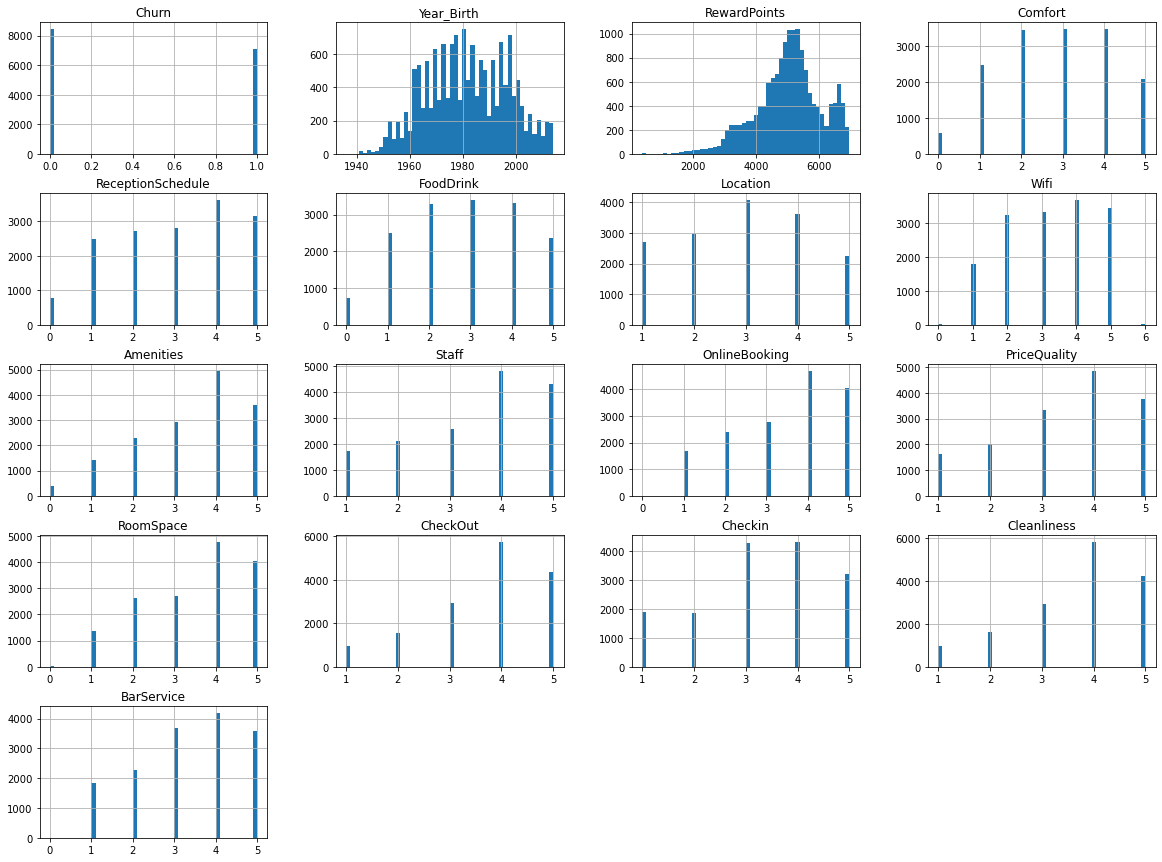

In [11]:
%matplotlib inline
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

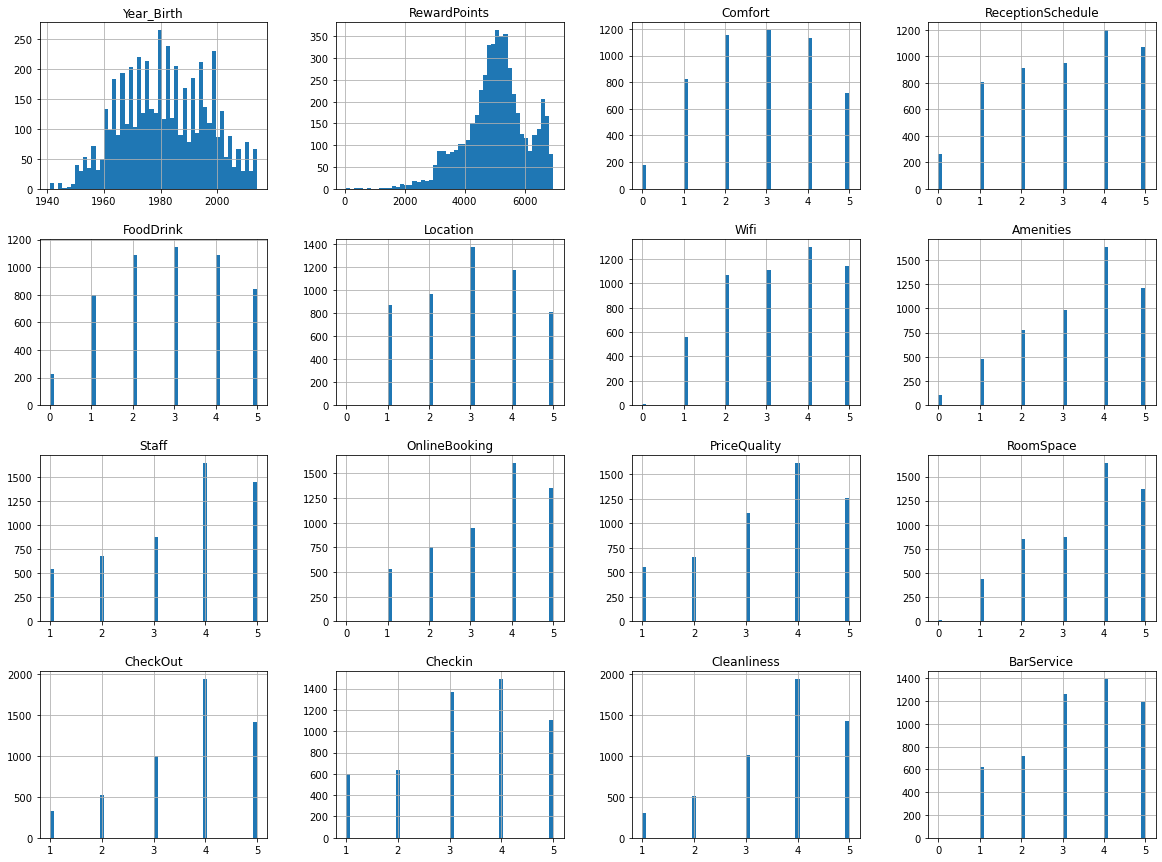

In [12]:
%matplotlib inline
df_test.hist(bins = 50, figsize = (20, 15))
plt.show()

<AxesSubplot:>

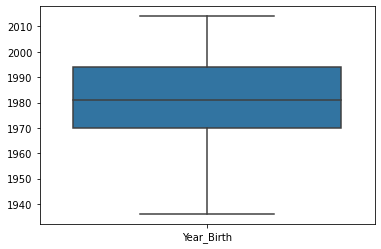

In [13]:
sns.boxplot(data = df_train[['Year_Birth']])

<AxesSubplot:>

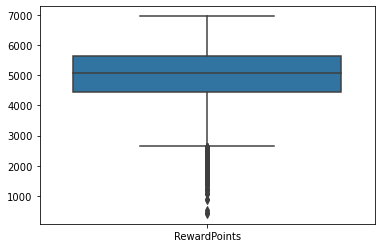

In [14]:
sns.boxplot(data = df_train[['RewardPoints']])

<AxesSubplot:xlabel='RewardPoints', ylabel='Year_Birth'>

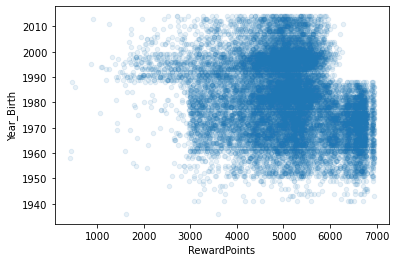

In [15]:
df_train.plot(kind = "scatter", x = "RewardPoints", y = "Year_Birth", alpha = 0.1)

In [16]:
df_train.skew()

Churn                0.175720
Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

How to interpret the skewness:
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed.


Amenities, Staff, PriceQuality, CheckOut and Cleanliness appear to have a moderate negative skewness.

In [17]:
df_train.kurt()

Churn               -1.969375
Year_Birth          -0.729844
RewardPoints         0.260162
Comfort             -0.935490
ReceptionSchedule   -1.077415
FoodDrink           -0.967006
Location            -1.076634
Wifi                -1.111382
Amenities           -0.540790
Staff               -0.859138
OnlineBooking       -0.931961
PriceQuality        -0.772889
RoomSpace           -0.864568
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.949633
dtype: float64

Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0. Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.
- High kurtosis in a data set is an indicator that data has heavy outliers.
- Low kurtosis in a data set is an indicator that data has lack of outliers.

The variable with the highest kurtosis are ReceptionSchedule, Location, Wifi. RewardPoints variable has a positive kurtosis while its skewness statistic was negative.
The target variables has a negative kurtosis of almost 2.

#### 1.6 Check the values of categorical variables

In [18]:
df_train['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

The y value will be converted into yes.

In [19]:
df_train['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

In [20]:
df_train['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

#### 1.7 Check the values of review score variables

In [21]:
df_train.columns
review = df_train.columns[7:-1]
review

Index(['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness'],
      dtype='object')

In [22]:
for i in review:
    print(i)
    print(df_train[i].value_counts())
    print('')

Comfort
3    3498
4    3475
2    3452
1    2487
5    2100
0     574
Name: Comfort, dtype: int64

ReceptionSchedule
4    3633
5    3171
3    2797
2    2725
1    2484
0     776
Name: ReceptionSchedule, dtype: int64

FoodDrink
3    3406
4    3324
2    3282
1    2490
5    2353
0     731
Name: FoodDrink, dtype: int64

Location
3    4084
4    3606
2    2957
1    2687
5    2252
Name: Location, dtype: int64

Wifi
4    3703
5    3445
3    3347
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

Amenities
4    4962
5    3583
3    2931
2    2307
1    1427
0     376
Name: Amenities, dtype: int64

Staff
4    4832
5    4316
3    2598
2    2107
1    1733
Name: Staff, dtype: int64

OnlineBooking
4    4696
5    4054
3    2779
2    2391
1    1664
0       2
Name: OnlineBooking, dtype: int64

PriceQuality
4    4864
5    3762
3    3345
2    2005
1    1610
Name: PriceQuality, dtype: int64

RoomSpace
4    4785
5    4044
3    2701
2    2624
1    1386
0      46
Name: RoomSpace, dtype: int64

Chec

* The Wifi feature has a value of 6 when the maximum value allowed for this variable is 5. \
* We will replace these values with the mode.

#### 1.8 Create a Gender variable for both training and test set

In [23]:
df_train['prefix'] = df_train['Name'].str[0:2]
df_train['Gender'] = np.where(df_train['prefix']!= 'Mr', 1, 0)
df_train.drop('prefix', axis = 1, inplace = True)
df_train

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,4,3,3,3,3,4,3,4,1
2,0,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,3,4,5,5,5,5,1,5,2,0
3,1,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,4,4,3,3,2,3,2,3,1,0
4,0,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,5,4,4,4,4,4,4,3,1
5,0,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,3,4,1,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,2,4,3,4,5,1,3,4,3,1
15586,1,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,3,5,5,3,1,3,4,4,5,1
15587,0,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,5,4,4,4,4,5,4,4,0


In [24]:
df_test['prefix'] = df_test['Name'].str[0:2]
df_test['Gender'] = np.where(df_test['prefix']!= 'Mr', 1, 0)
df_test.drop('prefix', axis = 1, inplace = True)
df_test

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,2,...,2,1,1,5,3,4,4,4,1,0
30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,1,...,2,4,4,4,5,4,3,1,4,0
30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,3,...,4,1,2,5,5,5,3,4,2,0
30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,3,...,4,3,3,3,5,5,3,4,3,0
30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,2,...,4,3,4,4,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,yes,1959,business,single,6743,2,3,3,3,...,3,3,2,2,3,2,3,2,4,1
35191,Mr. Tim Martinez,yes,1971,business,double,5965,5,2,2,2,...,5,5,5,3,2,3,4,1,5,0
35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,1,...,3,3,3,3,4,4,1,3,3,0


#### 1.9 Create the variable Age

In [25]:
from datetime import date
df_train['Age'] = date.today().year - df_train['Year_Birth'] # define a new variable called Age
df_train.drop('Year_Birth', axis = 1, inplace = True)
df_train['Age'] = df_train['Age'].apply(np.floor)
df_train

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,4,3,3,3,3,4,3,4,1,48.0
2,0,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,4,5,5,5,5,1,5,2,0,57.0
3,1,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,3,3,2,3,2,3,1,0,49.0
4,0,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,5,4,4,4,4,4,4,3,1,29.0
5,0,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,3,4,1,3,5,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,4,5,1,3,4,3,1,34.0
15586,1,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,5,5,3,1,3,4,4,5,1,22.0
15587,0,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,5,4,4,4,4,5,4,4,0,58.0


In [26]:
df_test['Age'] = date.today().year - df_test['Year_Birth'] # define a new variable called Age
df_test.drop('Year_Birth', axis = 1, inplace = True)
df_test['Age'] = df_test['Age'].apply(np.floor)
df_test

,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,leisure,double,5584,2,4,2,2,1,...,1,1,5,3,4,4,4,1,0,66.0
30001,Mr. Mathew Howard,yes,leisure,double,5970,2,4,2,1,4,...,4,4,4,5,4,3,1,4,0,18.0
30002,Mr. Brian Peters,no,business,single,5122,5,4,4,3,2,...,1,2,5,5,5,3,4,2,0,30.0
30003,Mr. Robert Henderson,yes,leisure,double,5297,4,5,4,3,3,...,3,3,3,5,5,3,4,3,0,36.0
30004,Ms. Stephanie Drake,yes,business,double,6047,4,2,2,2,5,...,3,4,4,4,4,4,4,4,1,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,yes,business,single,6743,2,3,3,3,2,...,3,2,2,3,2,3,2,4,1,63.0
35191,Mr. Tim Martinez,yes,business,double,5965,5,2,2,2,5,...,5,5,3,2,3,4,1,5,0,51.0
35192,Mr. Michael Webb,yes,business,double,5373,3,1,1,1,3,...,3,3,3,4,4,1,3,3,0,68.0


In [27]:
df_train[df_train['Age'].isna() & df_train['Name'].duplicated()]

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
3126,0,Ms. Elizabeth Davis,yes,business,single,3022,3,3,3,3,...,5,5,5,5,5,5,5,5,1,NaN
3895,1,Ms. Elizabeth Rodriguez,yes,business,single,4693,3,5,5,5,...,3,2,1,3,2,3,1,3,1,NaN
4299,1,Ms. Elizabeth Boyer,no,business,double,4681,4,4,4,1,...,2,2,5,3,2,1,4,2,1,NaN
5095,0,Ms. Elizabeth Martinez,yes,business,single,3323,5,5,1,5,...,4,4,4,4,4,4,4,3,1,NaN
5446,0,Ms. Elizabeth Brown,yes,leisure,double,6103,1,1,5,1,...,4,4,4,2,4,5,5,4,1,NaN
5720,0,Ms. Elizabeth Smith,yes,business,double,4621,5,2,2,2,...,5,5,1,4,5,1,5,5,1,NaN
6061,0,Ms. Elizabeth Rodriguez,yes,leisure,double,6003,4,4,4,4,...,4,4,4,4,4,5,4,5,1,NaN
6775,1,Mr. Edward Williams,y,leisure,double,5235,3,3,3,3,...,5,2,1,4,4,4,1,2,0,NaN
8543,0,Ms. Elizabeth Brown,yes,business,double,6762,3,2,2,2,...,2,3,3,3,3,5,3,2,1,NaN


We have 23 records of clients with missing values for Age and duplicated.

In [28]:
null = df_train[df_train['Age'].isna()]  # Clients with missing values for Age
dup = df_train[df_train.Name.duplicated() & df_train['Age']]             # Clients with name duplicated
listanomes = list(set(null.Name) & set(dup.Name)) # List with Clients with both Age missing and Name duplicated
dup[dup['Name'].isin(listanomes)].head()

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
4188,1,Mr. Edward Anderson,y,leisure,double,4853,2,2,2,4,...,3,2,3,1,3,2,4,2,0,22.0
10124,1,Ms. Emily Thomas,yes,business,double,4138,3,4,4,4,...,3,3,3,5,4,4,3,3,1,33.0


In [29]:
df_train[df_train['Name'] == 'Ms. Emily Thomas']

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
28,0,Ms. Emily Thomas,yes,leisure,double,4760,0,5,0,3,...,3,5,4,4,5,4,4,5,1,NaN
10124,1,Ms. Emily Thomas,yes,business,double,4138,3,4,4,4,...,3,3,3,5,4,4,3,3,1,33.0


In [30]:
df_train.loc[(df_train.Name == 'Ms. Emily Thomas'),'Age'] = 33

In [31]:
df_train[df_train['Name'] == 'Ms. Emily Thomas']

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
28,0,Ms. Emily Thomas,yes,leisure,double,4760,0,5,0,3,...,3,5,4,4,5,4,4,5,1,33.0
10124,1,Ms. Emily Thomas,yes,business,double,4138,3,4,4,4,...,3,3,3,5,4,4,3,3,1,33.0


In [32]:
df_train[df_train['Name'] == 'Mr. Edward Anderson']

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1977,1,Mr. Edward Anderson,y,leisure,double,4906,4,4,4,3,...,3,3,2,1,3,2,4,3,0,69.0
4188,1,Mr. Edward Anderson,y,leisure,double,4853,2,2,2,4,...,3,2,3,1,3,2,4,2,0,22.0
12076,1,Mr. Edward Anderson,y,leisure,double,4845,1,2,1,3,...,1,1,4,2,4,2,4,1,0,NaN


In [33]:
df_train.loc[(df_train.Name == 'Mr. Edward Anderson'),'Age'] = 69

In [34]:
df_train[df_train['Name'] == 'Mr. Edward Anderson']

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1977,1,Mr. Edward Anderson,y,leisure,double,4906,4,4,4,3,...,3,3,2,1,3,2,4,3,0,69.0
4188,1,Mr. Edward Anderson,y,leisure,double,4853,2,2,2,4,...,3,2,3,1,3,2,4,2,0,69.0
12076,1,Mr. Edward Anderson,y,leisure,double,4845,1,2,1,3,...,1,1,4,2,4,2,4,1,0,69.0


For Mr. Edward Anderson we are not sure about the age of such client. There are 3 entries for the same Mr. Edward Anderson one with 22 years old, other with 69 years old and one with missing values. We decided to use the value 69 for Age of this client since this was the age that was imputed in the first entry of this client at the company.
We decided not to use other imputation method since we don't want to leak data from the validation set into the training set when we split the data later on.

#### 1.10 Transform Categorical variables

##### Longevity

In [35]:
df_train['Longevity'] = df_train['Longevity'].replace('y', 'yes')
df_test['Longevity'] = df_test['Longevity'].replace('y', 'yes')
print('Training Set')
print(df_train['Longevity'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['Longevity'].value_counts())

Training Set
yes    12712
no      2874
Name: Longevity, dtype: int64
***********************************
Test Set
yes    4267
no      928
Name: Longevity, dtype: int64


In [36]:
df_train['Longevity'] = np.where(df_train['Longevity'] != 'yes', 1, 0)
df_test['Longevity'] = np.where(df_test['Longevity'] != 'yes', 1, 0)
print('Training Set')
print(df_train['Longevity'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['Longevity'].value_counts())

Training Set
0    12712
1     2874
Name: Longevity, dtype: int64
***********************************
Test Set
0    4267
1     928
Name: Longevity, dtype: int64


##### Type of Travel

In [37]:
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] != 'leisure', 1, 0)
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] != 'leisure', 1, 0)
print('Training Set')
print(df_train['TypeTravel'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['TypeTravel'].value_counts())

Training Set
1    10754
0     4832
Name: TypeTravel, dtype: int64
***********************************
Test Set
1    3512
0    1683
Name: TypeTravel, dtype: int64


##### Room Type

In [38]:
df_train_tree = df_train.copy()
df_test_tree = df_test.copy()

##### Make sure we can do this to test set

In [39]:
df_train['Single'] = np.where(df_train['RoomType'] == 'single', 1, 0)
df_train['Double'] = np.where(df_train['RoomType'] == 'double', 1, 0)
df_test['Single'] = np.where(df_test['RoomType'] == 'single', 1, 0)
df_test['Double'] = np.where(df_test['RoomType'] == 'double', 1, 0)

print('Training Set')
print(df_train['RoomType'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['RoomType'].value_counts())

print('***********************************')
print('Training Set')
print('Single')
print(df_train['Single'].value_counts())
print('Double')
print(df_train['Double'].value_counts())

print('***********************************')
print('Test Set')
print('Single')
print(df_test['Single'].value_counts())
print('Double')
print(df_test['Double'].value_counts())

Training Set
single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64
***********************************
Test Set
single    2398
double    2392
suite      405
Name: RoomType, dtype: int64
***********************************
Training Set
Single
0    8144
1    7442
Name: Single, dtype: int64
Double
0    8567
1    7019
Name: Double, dtype: int64
***********************************
Test Set
Single
0    2797
1    2398
Name: Single, dtype: int64
Double
0    2803
1    2392
Name: Double, dtype: int64


In [40]:
df_train = df_train.drop('RoomType', axis = 1) # drop the Room Type variable
df_train

,Churn,Name,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,0,1,4907,3,4,1,4,4,...,3,3,3,4,3,4,1,48.0,1,0
2,0,Mr. Jesse Scott,0,1,6724,1,1,1,1,5,...,5,5,5,1,5,2,0,57.0,1,0
3,1,Mr. Christopher Carter,0,1,4365,3,3,3,3,1,...,3,2,3,2,3,1,0,49.0,1,0
4,0,Ms. Jennifer Morgan,0,0,3849,1,1,1,1,4,...,4,4,4,4,4,3,1,29.0,0,1
5,0,Mr. Michael White,0,1,5376,2,2,3,2,5,...,5,3,4,1,3,5,0,33.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,1,1,4968,2,0,2,2,3,...,4,5,1,3,4,3,1,34.0,0,1
15586,1,Ms. Sonya Smith,1,1,4970,3,3,3,3,5,...,3,1,3,4,4,5,1,22.0,0,1
15587,0,Mr. Maxwell Wright,0,1,4046,1,1,1,1,3,...,4,4,4,5,4,4,0,58.0,1,0


In [41]:
df_test = df_test.drop('RoomType', axis = 1) # drop the Room Type variable
df_test

,Name,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,0,0,5584,2,4,2,2,1,2,...,5,3,4,4,4,1,0,66.0,0,1
30001,Mr. Mathew Howard,0,0,5970,2,4,2,1,4,2,...,4,5,4,3,1,4,0,18.0,0,1
30002,Mr. Brian Peters,1,1,5122,5,4,4,3,2,4,...,5,5,5,3,4,2,0,30.0,1,0
30003,Mr. Robert Henderson,0,0,5297,4,5,4,3,3,4,...,3,5,5,3,4,3,0,36.0,0,1
30004,Ms. Stephanie Drake,0,1,6047,4,2,2,2,5,4,...,4,4,4,4,4,4,1,52.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,0,1,6743,2,3,3,3,2,3,...,2,3,2,3,2,4,1,63.0,1,0
35191,Mr. Tim Martinez,0,1,5965,5,2,2,2,5,5,...,3,2,3,4,1,5,0,51.0,0,1
35192,Mr. Michael Webb,0,1,5373,3,1,1,1,3,3,...,3,4,4,1,3,3,0,68.0,0,1


In [42]:
### Train set

df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'single', 1, df_train_tree['RoomType'])
df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'double', 2, df_train_tree['RoomType'])
df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'suite', 3, df_train_tree['RoomType'])

### Test Set
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'single', 1, df_test_tree['RoomType'])
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'double', 2, df_test_tree['RoomType'])
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'suite', 3, df_test_tree['RoomType'])

print('Training Set')
print(df_train_tree['RoomType'].value_counts())

print('***********************************')
print('Test Set')
print(df_test_tree['RoomType'].value_counts())


Training Set
1    7442
2    7019
3    1125
Name: RoomType, dtype: int64
***********************************
Test Set
1    2398
2    2392
3     405
Name: RoomType, dtype: int64


<AxesSubplot:>

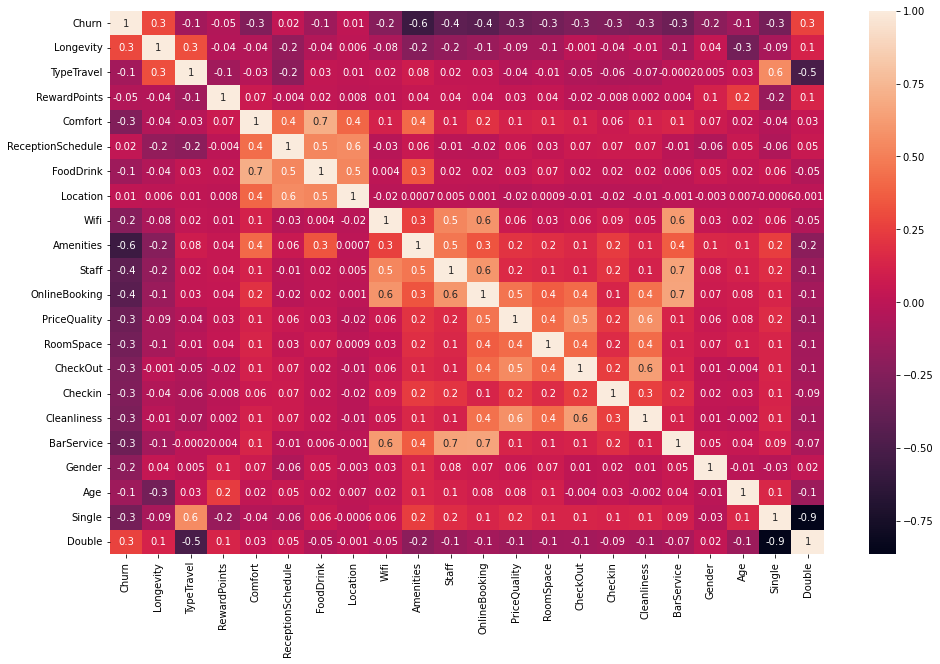

In [43]:
corr = df_train.corr(method = 'spearman')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot = True, fmt = '.1g')

In [44]:
df_train = df_train.drop('Name', axis = 1) # drop the Name variable
df_train

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,4907,3,4,1,4,4,3,...,3,3,3,4,3,4,1,48.0,1,0
2,0,0,1,6724,1,1,1,1,5,3,...,5,5,5,1,5,2,0,57.0,1,0
3,1,0,1,4365,3,3,3,3,1,4,...,3,2,3,2,3,1,0,49.0,1,0
4,0,0,0,3849,1,1,1,1,4,4,...,4,4,4,4,4,3,1,29.0,0,1
5,0,0,1,5376,2,2,3,2,5,5,...,5,3,4,1,3,5,0,33.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,1,1,4968,2,0,2,2,3,2,...,4,5,1,3,4,3,1,34.0,0,1
15586,1,1,1,4970,3,3,3,3,5,3,...,3,1,3,4,4,5,1,22.0,0,1
15587,0,0,1,4046,1,1,1,1,3,4,...,4,4,4,5,4,4,0,58.0,1,0


In [45]:
df_test = df_test.drop('Name', axis = 1) # drop the Name variable
df_test

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,0,0,5584,2,4,2,2,1,2,1,...,5,3,4,4,4,1,0,66.0,0,1
30001,0,0,5970,2,4,2,1,4,2,4,...,4,5,4,3,1,4,0,18.0,0,1
30002,1,1,5122,5,4,4,3,2,4,1,...,5,5,5,3,4,2,0,30.0,1,0
30003,0,0,5297,4,5,4,3,3,4,3,...,3,5,5,3,4,3,0,36.0,0,1
30004,0,1,6047,4,2,2,2,5,4,3,...,4,4,4,4,4,4,1,52.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,0,1,6743,2,3,3,3,2,3,3,...,2,3,2,3,2,4,1,63.0,1,0
35191,0,1,5965,5,2,2,2,5,5,5,...,3,2,3,4,1,5,0,51.0,0,1
35192,0,1,5373,3,1,1,1,3,3,3,...,3,4,4,1,3,3,0,68.0,0,1


### 2. Data Partition <a class="anchor" id="partition"></a>
[Back to Contents](#toc)

#### 2.1 Define the independent and dependent variables

In [46]:
X = df_train.drop('Churn', axis = 1) # drop the target variable
y = df_train['Churn']

#### 2.2 Divide the training set in training and validation set

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0 \
                                                   ,stratify = y, shuffle = True)

We decided to divide the training set into the train and validation set by 70% train and 30% validation.
We used the sratified sampling method in order to preserve class representation in both training and validation sets.

#### 2.3 Check missing values in the newly formed subsets

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 13357 to 3600
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          10910 non-null  int64  
 1   TypeTravel         10910 non-null  int64  
 2   RewardPoints       10910 non-null  int64  
 3   Comfort            10910 non-null  int64  
 4   ReceptionSchedule  10910 non-null  int64  
 5   FoodDrink          10910 non-null  int64  
 6   Location           10910 non-null  int64  
 7   Wifi               10910 non-null  int64  
 8   Amenities          10910 non-null  int64  
 9   Staff              10910 non-null  int64  
 10  OnlineBooking      10910 non-null  int64  
 11  PriceQuality       10910 non-null  int64  
 12  RoomSpace          10910 non-null  int64  
 13  CheckOut           10910 non-null  int64  
 14  Checkin            10910 non-null  int64  
 15  Cleanliness        10910 non-null  int64  
 16  BarService         

In [49]:
X_train.describe()

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,...,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10787.000000,10910.000000,10910.000000
mean,0.186343,0.691659,5022.077269,2.827956,2.989551,2.834189,2.969111,3.241980,3.375619,3.505500,...,3.456462,3.466269,3.702933,3.319707,3.690742,3.351054,0.509991,40.175118,0.476719,0.449771
std,0.389401,0.461829,1029.400372,1.388244,1.523273,1.439368,1.304097,1.328146,1.352614,1.321781,...,1.268761,1.293528,1.159251,1.267968,1.152763,1.301594,0.499923,15.129064,0.499481,0.497493
min,0.000000,0.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000
25%,0.000000,0.000000,4450.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,28.000000,0.000000,0.000000
50%,0.000000,1.000000,5099.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,1.000000,41.000000,0.000000,0.000000
75%,0.000000,1.000000,5644.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,52.000000,1.000000,1.000000
max,1.000000,1.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,81.000000,1.000000,1.000000


In [50]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 8850 to 4598
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          4676 non-null   int64  
 1   TypeTravel         4676 non-null   int64  
 2   RewardPoints       4676 non-null   int64  
 3   Comfort            4676 non-null   int64  
 4   ReceptionSchedule  4676 non-null   int64  
 5   FoodDrink          4676 non-null   int64  
 6   Location           4676 non-null   int64  
 7   Wifi               4676 non-null   int64  
 8   Amenities          4676 non-null   int64  
 9   Staff              4676 non-null   int64  
 10  OnlineBooking      4676 non-null   int64  
 11  PriceQuality       4676 non-null   int64  
 12  RoomSpace          4676 non-null   int64  
 13  CheckOut           4676 non-null   int64  
 14  Checkin            4676 non-null   int64  
 15  Cleanliness        4676 non-null   int64  
 16  BarService         46

There are missing values in the feature Year_Birth in both the training data and the validation data.

In [51]:
X_val.describe()

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
count,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,...,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4606.000000,4676.000000,4676.000000
mean,0.179855,0.686056,5023.214927,2.872541,3.014542,2.868263,3.024808,3.251925,3.372327,3.508127,...,3.466852,3.481608,3.694825,3.345381,3.695894,3.338965,0.517109,40.588580,0.479256,0.451668
std,0.384107,0.464143,1024.634442,1.388881,1.509117,1.431117,1.287797,1.324652,1.352105,1.314721,...,1.266927,1.294449,1.157493,1.264506,1.158605,1.297611,0.499761,15.301979,0.499623,0.497712
min,0.000000,0.000000,874.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000
25%,0.000000,0.000000,4436.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,28.000000,0.000000,0.000000
50%,0.000000,1.000000,5068.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,41.000000,0.000000,0.000000
75%,0.000000,1.000000,5664.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,52.000000,1.000000,1.000000
max,1.000000,1.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,86.000000,1.000000,1.000000


#### 2.4 Fill the missing values in Age

In [52]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_train.isna().sum()

Longevity            0
TypeTravel           0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
Age                  0
Single               0
Double               0
dtype: int64

In [53]:
X_val['Age'] = X_val['Age'].fillna(X_train['Age'].median()) # use the median from the train set
X_val.isna().sum()

Longevity            0
TypeTravel           0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
Age                  0
Single               0
Double               0
dtype: int64

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 13357 to 3600
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          10910 non-null  int64  
 1   TypeTravel         10910 non-null  int64  
 2   RewardPoints       10910 non-null  int64  
 3   Comfort            10910 non-null  int64  
 4   ReceptionSchedule  10910 non-null  int64  
 5   FoodDrink          10910 non-null  int64  
 6   Location           10910 non-null  int64  
 7   Wifi               10910 non-null  int64  
 8   Amenities          10910 non-null  int64  
 9   Staff              10910 non-null  int64  
 10  OnlineBooking      10910 non-null  int64  
 11  PriceQuality       10910 non-null  int64  
 12  RoomSpace          10910 non-null  int64  
 13  CheckOut           10910 non-null  int64  
 14  Checkin            10910 non-null  int64  
 15  Cleanliness        10910 non-null  int64  
 16  BarService         

In [55]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 8850 to 4598
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          4676 non-null   int64  
 1   TypeTravel         4676 non-null   int64  
 2   RewardPoints       4676 non-null   int64  
 3   Comfort            4676 non-null   int64  
 4   ReceptionSchedule  4676 non-null   int64  
 5   FoodDrink          4676 non-null   int64  
 6   Location           4676 non-null   int64  
 7   Wifi               4676 non-null   int64  
 8   Amenities          4676 non-null   int64  
 9   Staff              4676 non-null   int64  
 10  OnlineBooking      4676 non-null   int64  
 11  PriceQuality       4676 non-null   int64  
 12  RoomSpace          4676 non-null   int64  
 13  CheckOut           4676 non-null   int64  
 14  Checkin            4676 non-null   int64  
 15  Cleanliness        4676 non-null   int64  
 16  BarService         46

In [56]:
print(X_train['Age'].median())
print(X_val['Age'].median())

41.0
41.0


#### 2.5 Feature Scalling

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # we must use these fitted scaler in the validation set

X_train_scaled = scaler.transform(X_train) # this will return an array
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index) # Convert the array to a pandas dataframe
X_train_scaled.head(5)

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
13357,0.0,1.0,0.439688,0.2,0.4,0.4,0.25,0.166667,0.6,0.75,...,0.00,0.2,0.00,0.75,0.00,0.2,1.0,0.493151,1.0,0.0
2287,0.0,1.0,0.771136,1.0,1.0,1.0,1.00,0.666667,1.0,1.00,...,1.00,1.0,1.00,1.00,1.00,0.6,0.0,0.506849,1.0,0.0
9941,1.0,1.0,0.814249,0.6,0.4,0.6,0.50,0.500000,0.6,0.50,...,0.50,0.2,0.75,0.00,0.50,0.6,1.0,0.232877,0.0,1.0
12172,0.0,1.0,0.927687,0.8,0.4,0.4,0.25,0.333333,0.6,0.50,...,0.75,0.8,0.75,0.75,0.75,0.8,1.0,0.520548,0.0,1.0
15330,1.0,1.0,0.672068,0.8,0.4,0.8,0.25,0.333333,0.8,0.25,...,0.00,0.6,0.50,0.00,0.25,0.4,1.0,0.191781,1.0,0.0


We are going to use the fitted MinMax Scaler on the training set to scale the validation set.

In [58]:
X_val_scaled = scaler.transform(X_val) # Using the same scaler of training data
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns, index = X_val.index)
X_val_scaled.head(5)

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8850,0.0,0.0,0.812720,1.0,1.0,1.0,0.75,0.333333,1.0,0.25,...,0.75,0.6,0.75,0.75,1.00,0.4,0.0,0.506849,0.0,1.0
2075,0.0,1.0,0.524690,0.4,0.8,0.4,0.25,0.666667,0.8,0.75,...,0.75,0.6,0.75,0.50,1.00,0.8,0.0,0.191781,1.0,0.0
6596,0.0,1.0,0.726189,0.8,0.8,0.8,0.75,0.333333,1.0,0.00,...,0.75,0.8,0.75,0.50,0.75,0.4,0.0,0.424658,1.0,0.0
6364,0.0,1.0,0.605871,0.8,1.0,0.8,0.75,0.666667,0.8,0.75,...,0.50,0.8,1.00,0.75,0.50,0.8,1.0,0.383562,1.0,0.0
10497,0.0,0.0,0.684299,0.8,0.8,0.8,0.75,0.333333,0.8,1.00,...,0.75,0.8,0.00,0.75,0.75,0.6,1.0,0.082192,0.0,1.0


### 3. Feature Selection - Logistic Regression <a class="anchor" id="selection"></a>
[Back to Contents](#toc)

#### 3.1 Filter methods

#### 3.1.1 Univariate features

In [59]:
X_train_scaled.var()

Longevity            0.151633
TypeTravel           0.213286
RewardPoints         0.024767
Comfort              0.077089
ReceptionSchedule    0.092814
FoodDrink            0.082871
Location             0.106292
Wifi                 0.048999
Amenities            0.073183
Staff                0.109194
OnlineBooking        0.068513
PriceQuality         0.100610
RoomSpace            0.066929
CheckOut             0.083991
Checkin              0.100484
Cleanliness          0.083054
BarService           0.067766
Gender               0.249923
Age                  0.042469
Single               0.249481
Double               0.247500
dtype: float64

No features with zero variance, based on this we should keep all the features as of now.

#### 3.1.2  Spearman Correlation

In [60]:
all_train = X_train_scaled.join(y_train)
all_train.head()

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double,Churn
Cust_ID,,,,,,,,,,,,,,,,,,,,,
13357,0.0,1.0,0.439688,0.2,0.4,0.4,0.25,0.166667,0.6,0.75,...,0.2,0.00,0.75,0.00,0.2,1.0,0.493151,1.0,0.0,1
2287,0.0,1.0,0.771136,1.0,1.0,1.0,1.00,0.666667,1.0,1.00,...,1.0,1.00,1.00,1.00,0.6,0.0,0.506849,1.0,0.0,0
9941,1.0,1.0,0.814249,0.6,0.4,0.6,0.50,0.500000,0.6,0.50,...,0.2,0.75,0.00,0.50,0.6,1.0,0.232877,0.0,1.0,1
12172,0.0,1.0,0.927687,0.8,0.4,0.4,0.25,0.333333,0.6,0.50,...,0.8,0.75,0.75,0.75,0.8,1.0,0.520548,0.0,1.0,1
15330,1.0,1.0,0.672068,0.8,0.4,0.8,0.25,0.333333,0.8,0.25,...,0.6,0.50,0.00,0.25,0.4,1.0,0.191781,1.0,0.0,1


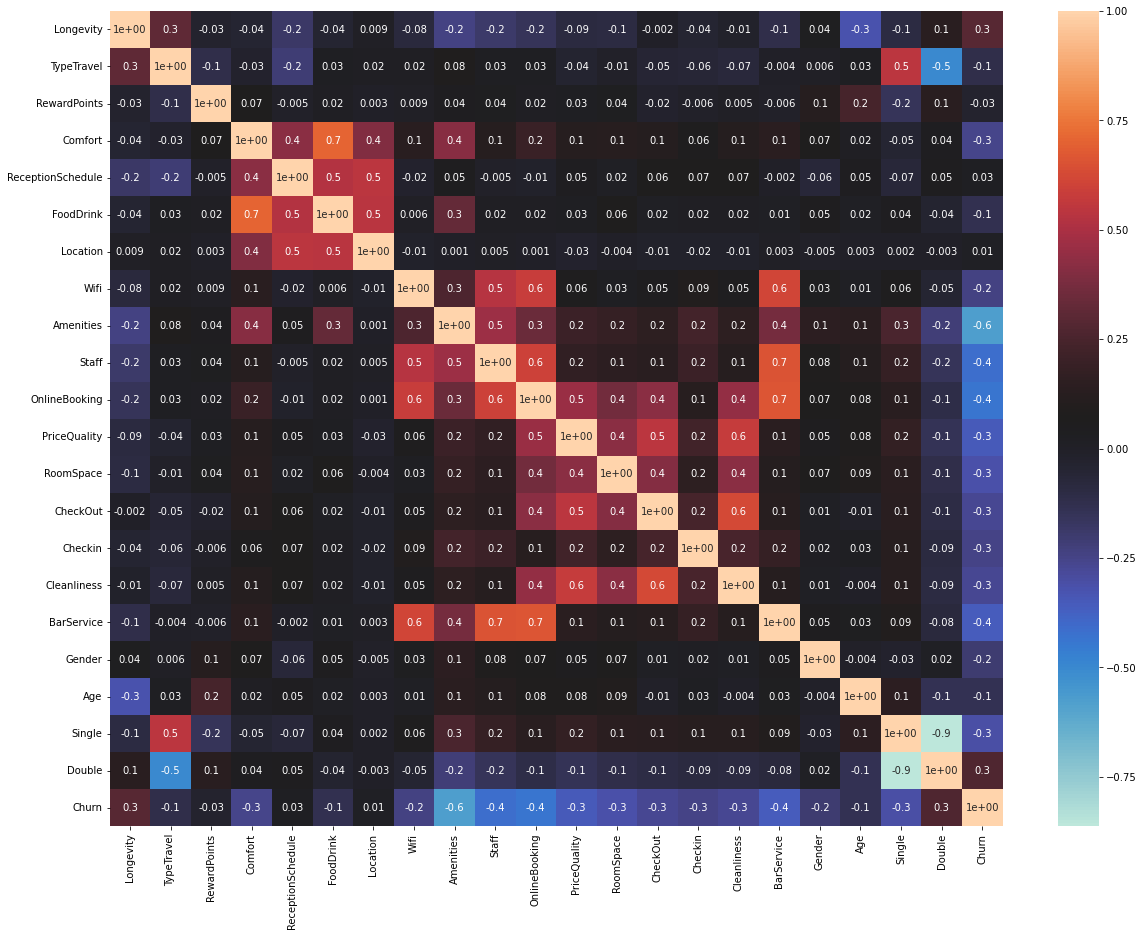

In [61]:
def cor_heatmap(cor):
    plt.figure(figsize=(20,15))
    sns.heatmap(data = cor, annot = True, cmap = 'icefire', fmt='.1')
    plt.show()
    
cor_spearman = all_train.corr(method ='spearman')
cor_heatmap(cor_spearman)

We can conclude that:

There is no independent variable highly correlated with the target. However there are a few features that appear to have a low linear correlation with the target variable, them being RewardPoints, Location, and ReceptionSchedule. We need to use other feature selection techniques to get more insights.
\
Variables highly correlated, namely:
* BarService vs OnlineBooking (0.7)
* BarService vs Staff (0.7)
* Comfort vs FoodDrink (0.7)
\
\
We need to use other techniques of feature selection to decide which variables should we keep.

#### 3.2 Wrapper Methods

#### 3.2.1 RFE/Backwards Filtering

In [62]:
model = LogisticRegression()

In [63]:
#no of features
nof_list=np.arange(1, 21)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 18
Score with 18 features: 0.829341


In [64]:
rfe = RFE(estimator = model, n_features_to_select = 18)
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [65]:
X_rfe

array([[0.        , 1.        , 0.43968812, ..., 1.        , 0.49315068,
        1.        ],
       [0.        , 1.        , 0.77113591, ..., 0.        , 0.50684932,
        1.        ],
       [1.        , 1.        , 0.81424859, ..., 1.        , 0.23287671,
        0.        ],
       ...,
       [0.        , 0.        , 0.59685063, ..., 0.        , 0.24657534,
        0.        ],
       [1.        , 1.        , 0.60174285, ..., 0.        , 0.19178082,
        0.        ],
       [0.        , 1.        , 0.42485858, ..., 1.        , 0.52054795,
        1.        ]])

In [66]:
X_train_scaled.columns

Index(['Longevity', 'TypeTravel', 'RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'Gender', 'Age', 'Single',
       'Double'],
      dtype='object')

In [67]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [68]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3])

In [69]:
selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features

Longevity             True
TypeTravel            True
RewardPoints          True
Comfort               True
ReceptionSchedule     True
FoodDrink             True
Location              True
Wifi                 False
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut              True
Checkin               True
Cleanliness          False
BarService            True
Gender                True
Age                   True
Single                True
Double               False
dtype: bool

Based on the RFE methodthe optional number of features to train our model with a Logistic Regression would be 18 features. From all the features present in the dataset we should drop Wifi, Cleanliness and Double, according to RFE wrapper method.

#### 3.3 Embedded Methods

#### 3.3.1 Lasso Regression

In [70]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [71]:
lasso_cv = make_pipeline(LassoCV())
lasso_cv.fit(X_train_scaled, y_train)

Pipeline(steps=[('lassocv', LassoCV())])

In [72]:
features = X_train_scaled.columns.tolist()

In [73]:
lasso_cv_coef = lasso_cv[-1].coef_
lasso_cv[-1].alpha_
list(zip(features, lasso_cv_coef))

[('Longevity', 0.29111531910218486),
 ('TypeTravel', -0.11406054264496536),
 ('RewardPoints', -0.05318962676109913),
 ('Comfort', -0.2146249911471468),
 ('ReceptionSchedule', 0.15738660782084735),
 ('FoodDrink', 0.1353618973909432),
 ('Location', -0.05651717438723568),
 ('Wifi', 0.03200383667096553),
 ('Amenities', -0.4884881690685011),
 ('Staff', -0.07714284488825995),
 ('OnlineBooking', -0.18466521544843217),
 ('PriceQuality', -0.17340514430412413),
 ('RoomSpace', -0.1860992420809732),
 ('CheckOut', -0.03055740811020349),
 ('Checkin', -0.1520692827474713),
 ('Cleanliness', -0.02747399923432574),
 ('BarService', -0.13070638177560417),
 ('Gender', -0.1394253932623344),
 ('Age', 0.06420487717856137),
 ('Single', -0.11664939415827659),
 ('Double', -0.023920793595600648)]

Using Lasso Regression for Feature Selection we observe that no feature has 0 coeficient, meaning that considering only Lasso Regression we would keep all the features to train the model.

#### 3.3 Final Insights

| Predictor | Spearman | RFE | Lasso | Decision | 
| --- | --- | --- | --- |--- |
| Longevity | Discard | Keep | Keep | Include in the model |
| TypeTravel | Discard | Keep | Keep | Include in the model |
| RewardPoints | Discard | Keep | Keep | Include in the model |
| Comfort | Discard | Keep | Keep | Include in the model |
| ReceptionSchedule | Keep | Keep | Keep | Include in the model |
| FoodDrink | Discard | Keep | Keep |  Include in the model |
| Wifi | Discard | Discard | Keep |  Try with and without it |
| Amenities | Keep | Keep | Keep |  Include in the model |
| Staff | Keep | Keeep | Keep |  Include in the model |
| OnlineBooking | Keep | Kepp | Keep |  Include in the model |
| PriceQuality | Discard | Keep | Keep |  Include in the model |
| RoomSpace | Discard | Keep | Keep |  Include in the model |
| CheckOut | Discard | Keep | Keep |  Include in the model |
| Checkin | Discard | Keep | Keep |  Include in the model |
| Cleanliness | Discard | Discard | Keep |  Try with and without it |
| BarService | Keep | Keep | Keep |  Include in the model |
| Gender | Discard | Keep | Keep |  Include in the model |
| Age | Discard | Keep | Keep |  Include in the model |
| Single | Discard | Keep | Keep |  Include in the model |
| Double | Discard | Discard | Keep |  Try with and without it |

We are going to create 2 datasets, one with all the features mentioned above and one without the features: Wifi, Cleanliness, and Double.

In [74]:
X_train_scaled_2 = X_train_scaled.copy()
X_val_scaled_2 = X_val_scaled.copy()

In [75]:
X_train_scaled_2.drop(['Wifi', 'Cleanliness', 'Double'], axis = 1, inplace = True)
X_val_scaled_2.drop(['Wifi', 'Cleanliness', 'Double'], axis = 1, inplace = True)

### 4. Logistic Regression <a class="anchor" id="logistic"></a>
[Back to Contents](#toc)

#### 4.1 Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [78]:
y_pred_log_reg = log_reg.predict(X_val_scaled)

Fit a Logistic Regression model to our scaled data.


In [79]:
print('Train:', log_reg.score(X_train_scaled, y_train))
print('Validation:', log_reg.score(X_val_scaled, y_val))

Train: 0.831897341888176
Validation: 0.8293413173652695


The accuracy using a Logistic Regression model on the dataset with all the features is 83.1% for the training data and 82.9% for the validation data, meaning that the model slightly overfits the training set.

In [80]:
len(df_train[df_train['Churn'] == 1])/len(df_train)

0.45624278198383167

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score

# for the dataset with all the features 

print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_log_reg))
print('*************************************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_log_reg))
print('*************************************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_log_reg))
print('*************************************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_log_reg))
print('*************************************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_log_reg))
print('*************************************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_log_reg)) 

Confusion Matrix:
 
[[2148  395]
 [ 403 1730]]
*************************************
Accuracy Score:
 
0.8293413173652695
*************************************
Balanced Accuracy:
 
0.8278679382229959
*************************************
Precision:
 
0.8141176470588235
*************************************
Recall:
 
0.8110642287857478
*************************************
F1 Score:
 
0.8125880695162049


* By observing the output of the above cell we can conclude a few things: the confusion matrix tells us thet our model is identifying 2148 True Negatives, and 1730 True Positives. With 395 False Positives and 403 False Negatives. 

* We can also observe that all the metrics computed above are somewhat similar and we tend to have a very good balance between Precision and Recall.

* This is due to the fact that our dataset is very balanced between clients that have Churned and clients that have not (1s and 0s). Considering this fact we believe that the best metric to evaluate our model would be the F1 Score and the Accuracy since we have a very balanced dataset and the importance of False Negatives is somewhat similar to the importance of False Positives.

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, y_pred_log_reg)
auc = roc_auc_score(y_val, y_pred_log_reg)

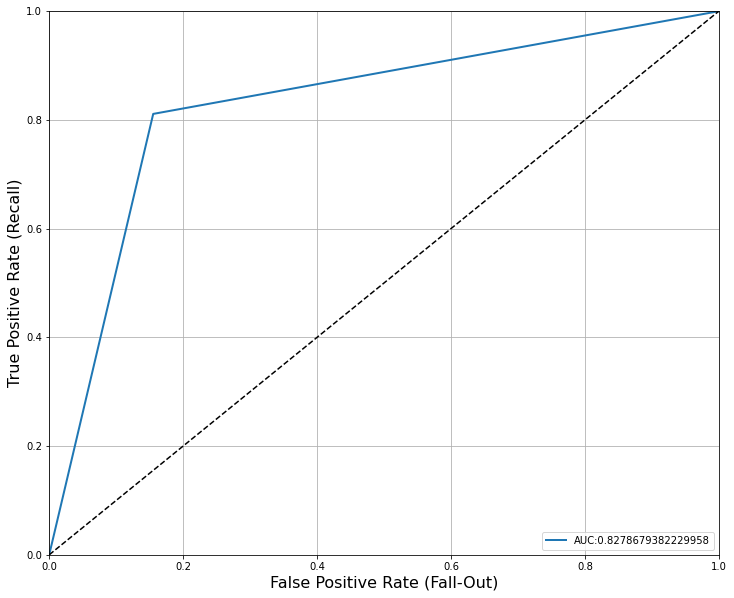

In [83]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr, tpr, label = 'AUC:' + str(auc))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

In [84]:
log_reg.fit(X_train_scaled_2, y_train)
y_pred_log_reg_2 = log_reg.predict(X_val_scaled_2)

In [85]:
print('Train:', log_reg.score(X_train_scaled_2, y_train))
print('Validation:', log_reg.score(X_val_scaled_2, y_val))

Train: 0.8330889092575618
Validation: 0.8293413173652695


In [86]:
f1_score(y_val, y_pred_log_reg_2) # for the dataset without all the features

0.8124118476727786

In [87]:
# for the dataset with missing features

print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_log_reg_2))
print('*************************************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_log_reg_2))
print('*************************************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_log_reg_2))
print('*************************************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_log_reg_2))
print('*************************************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_log_reg_2))
print('*************************************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_log_reg_2)) 

Confusion Matrix:
 
[[2150  393]
 [ 405 1728]]
*************************************
Accuracy Score:
 
0.8293413173652695
*************************************
Balanced Accuracy:
 
0.8277923513043998
*************************************
Precision:
 
0.8147100424328148
*************************************
Recall:
 
0.810126582278481
*************************************
F1 Score:
 
0.8124118476727786


After fitting the Logistic Regression on both datasets, with and without the features selected in Feature Selection, we conclude that that is not much difference in fitting the model with or without those features.\
In fact when we remove the features Wifi, Cleanliness and Double we end up with a model that overfits the training data more that the model trained on the entire dataset. \
We will try to train other models that might fit better our data, namely SVM, Decision Trees, Random Forest, XGBoost, and Neural Networks.

In [88]:
fpr_log, tpr_log, thresholds = roc_curve(y_val, y_pred_log_reg_2)
auc_log = roc_auc_score(y_val, y_pred_log_reg_2)

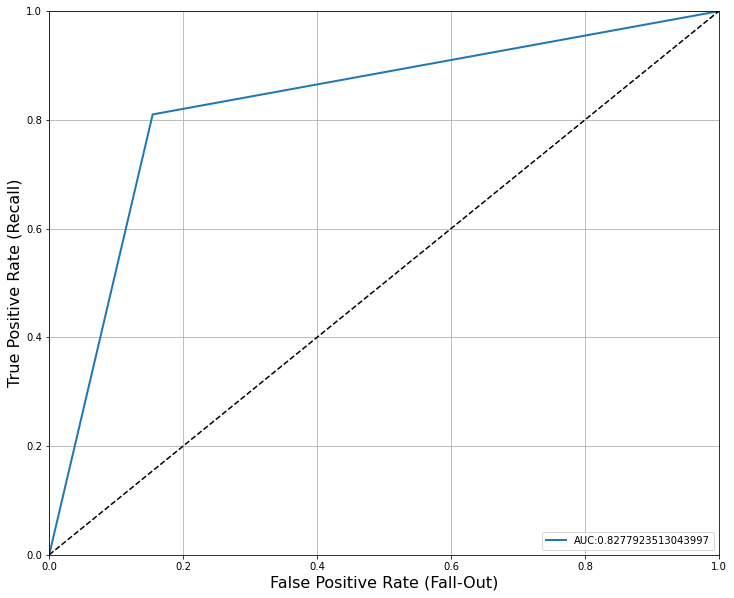

In [89]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_log, tpr_log, label = 'AUC:' + str(auc_log))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

### 5. Support Vector Machine (SVM) <a class="anchor" id="svm"></a>
[Back to Contents](#toc)

#### 5.1 Model Evaluation - SVM

In [90]:
from sklearn.svm import SVC

In [91]:
model_svm = SVC(C = 0.8, kernel = 'rbf', gamma= 1, degree= 2)

#### 5.1.1. Train the model in the entire dataset

In [92]:
model_svm.fit(X_train_scaled, y_train)

SVC(C=0.8, degree=2, gamma=1)

In [93]:
y_pred_svm = model_svm.predict(X_val_scaled)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
print('Train:', model_svm.score(X_train_scaled, y_train))
print('Validation:', model_svm.score(X_val_scaled, y_val))

Train: 0.9536205316223648
Validation: 0.9294268605645851


In [95]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_svm))
print('*************************************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_svm))
print('*************************************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_svm))
print('*************************************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_svm))
print('*************************************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_svm))
print('*************************************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_svm))

Confusion Matrix:
 
[[2385  158]
 [ 172 1961]]
*************************************
Accuracy Score:
 
0.9294268605645851
*************************************
Balanced Accuracy:
 
0.9286155297195781
*************************************
Precision:
 
0.9254365266635205
*************************************
Recall:
 
0.9193624003750586
*************************************
F1 Score:
 
0.9223894637817497


In [96]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_svm)
auc = roc_auc_score(y_val, y_pred_svm)

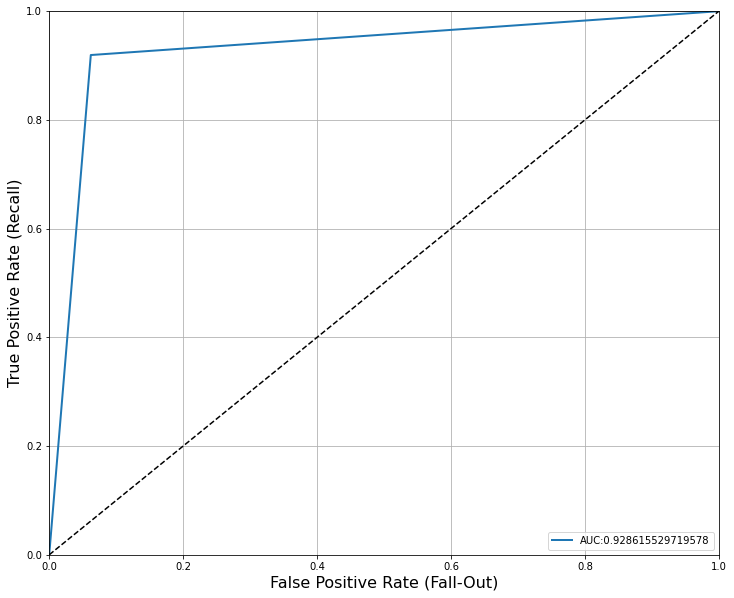

In [97]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr, tpr, label = 'AUC:' + str(auc))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

In [98]:
X_SVM_train = X_train_scaled.copy()
y_SVM_train = y_train.copy()
X_SVM_val = X_val_scaled.copy()
y_SVM_val = y_val.copy()

In [99]:
SVM_FeaturesTry = X_SVM_train[['Wifi','Cleanliness','Double']]

X_SVM_train_try = X_SVM_train.copy()
y_SVM_train_try = y_train.copy()
X_SVM_val_try = X_SVM_val.copy()
y_SVM_val_try = y_val.copy()

#Remove columns SVM_FeaturesTry

for cols in SVM_FeaturesTry:
    #print(cols)
    X_SVM_train_try.drop(str(cols), axis = 1, inplace=True) 
    X_SVM_val_try.drop(str(cols), axis = 1, inplace=True) 

input = SVM_FeaturesTry.columns
output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output

[[],
 ['Wifi'],
 ['Cleanliness'],
 ['Double'],
 ['Wifi', 'Cleanliness'],
 ['Wifi', 'Double'],
 ['Cleanliness', 'Double'],
 ['Wifi', 'Cleanliness', 'Double']]

In [100]:
SVM_metrics = pd.DataFrame(columns=['Features','F1','Train','Validation', 'Delta'])

for cols in output:
    X_SVM_train_renew = X_SVM_train_try.copy().join(X_SVM_train[cols])
    X_SVM_val_renew = X_SVM_val_try.copy().join(X_SVM_val[cols])
    
    # Fit for each combination of columns
    # Avoid warning in evaluation metric https://stackoverflow.com/questions/66097701/how-can-i-fix-this-warning-in-xgboost
    model_svm.fit(X_SVM_train_renew, y_SVM_train_try)
    
    # Predict
    svm_pred_try = model_svm.predict(X_SVM_val_renew)
    
    #Create metrics
    SVM_metrics.loc[SVM_metrics.shape[0]] = [cols, f1_score(y_SVM_val, svm_pred_try), model_svm.score(X_SVM_train_renew, y_SVM_train_try),
                                               model_svm.score(X_SVM_val_renew, y_SVM_val_try), model_svm.score(X_SVM_train_renew, y_SVM_train_try) - model_svm.score(X_SVM_val_renew, y_SVM_val_try)]
    
SVM_metrics

,Features,F1,Train,Validation,Delta
0,[],0.926519,0.948029,0.933276,0.014753
1,[Wifi],0.925029,0.948396,0.931779,0.016617
2,[Cleanliness],0.927427,0.952429,0.934132,0.018297
3,[Double],0.924670,0.947754,0.931565,0.016189
4,"[Wifi, Cleanliness]",0.925542,0.953437,0.932421,0.021016
5,"[Wifi, Double]",0.923946,0.948854,0.930924,0.017930
6,"[Cleanliness, Double]",0.923511,0.952521,0.930496,0.022024
7,"[Wifi, Cleanliness, Double]",0.922389,0.953621,0.929427,0.024194


In [101]:
X_train_scaled_svm_2 = X_train_scaled.copy()
X_val_scaled_svm_2 = X_val_scaled.copy()

In [102]:
X_train_scaled_svm_2.drop(['Wifi', 'Cleanliness'], axis = 1, inplace= True)

In [103]:
X_val_scaled_svm_2.drop(['Wifi', 'Cleanliness'], axis = 1, inplace= True)

In [104]:
model_svm.fit(X_train_scaled_svm_2, y_train)

SVC(C=0.8, degree=2, gamma=1)

In [105]:
y_pred_svm_2 = model_svm.predict(X_val_scaled_svm_2)
y_pred_svm_2

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
print('Train:', model_svm.score(X_train_scaled_svm_2, y_train))
print('Validation:', model_svm.score(X_val_scaled_svm_2, y_val))

Train: 0.9477543538038496
Validation: 0.9315654405474765


In [107]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_svm_2))
print('*************************************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_svm_2))
print('*************************************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_svm_2))
print('*************************************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_svm_2))
print('*************************************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_svm_2))
print('*************************************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_svm_2))

Confusion Matrix:
 
[[2392  151]
 [ 169 1964]]
*************************************
Accuracy Score:
 
0.9315654405474765
*************************************
Balanced Accuracy:
 
0.9306950917726589
*************************************
Precision:
 
0.9286052009456265
*************************************
Recall:
 
0.9207688701359588
*************************************
F1 Score:
 
0.9246704331450095


In [108]:
fpr_svm, tpr_svm, thresholds = roc_curve(y_val, y_pred_svm_2)
auc_svm = roc_auc_score(y_val, y_pred_svm_2)

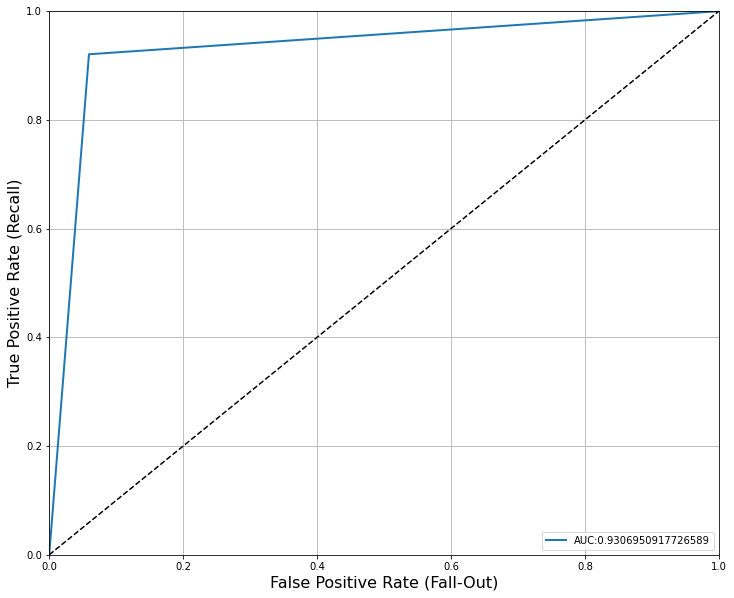

In [109]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_svm, tpr_svm, label = 'AUC:' + str(auc_svm))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

* We decided to test our model in the dataset without the variables Wifi and Cleanliness and concluded without these variables the SVM model doesn't overfit the training data as much.
* Therefore we will consider the dataset without these variables even though that the SVM model provides a slightly lower F1 score and a lower AUC score when compared with the model trained in the dataset with all the features.

### 6. Decision Tree Classifier <a class="anchor" id="decision"></a>
[Back to Contents](#toc)

#### 6.1. RFE - Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

model_rf = DecisionTreeClassifier()
#no of features
nof_list=np.arange(1, 21)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model_rf = DecisionTreeClassifier()
    rfe = RFE(model_rf, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)
    model_rf.fit(X_train_rfe,y_train)
    
    score = model_rf.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 19
Score with 19 features: 0.914243


In [111]:
rfe = RFE(estimator = model_rf, n_features_to_select = 17)
X_rfe = rfe.fit_transform(X = X_train, y = y_train)

In [112]:
selected_features_rf = pd.Series(rfe.support_, index = X_train.columns)
selected_features_rf

Longevity             True
TypeTravel            True
RewardPoints          True
Comfort               True
ReceptionSchedule     True
FoodDrink            False
Location              True
Wifi                 False
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut              True
Checkin               True
Cleanliness           True
BarService            True
Gender               False
Age                   True
Single                True
Double               False
dtype: bool

* Considering RFE, the optimal number of features to train our Decision Tree model would be 17 features. Those to drop would be: FoodDrink, Wifi, BarService and Double.

#### 6.2.1. Training a Decision Tree Classifier

In [113]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

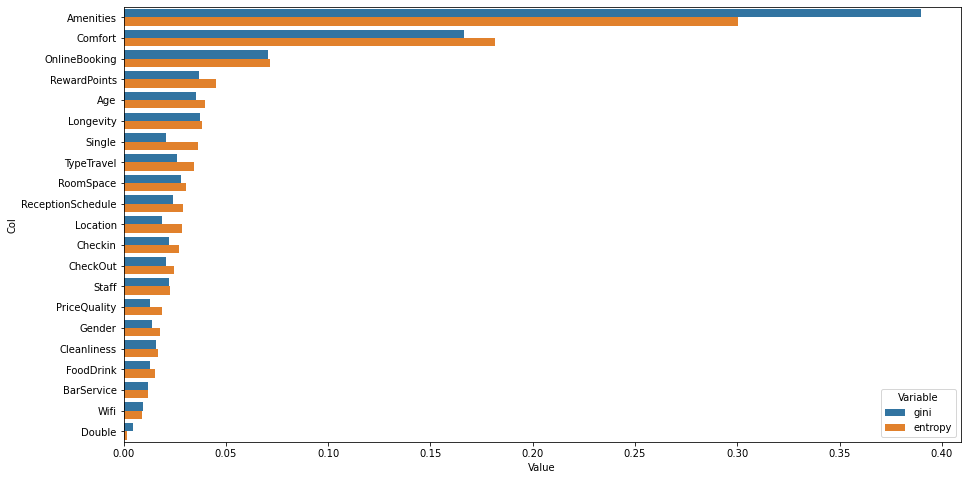

In [114]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

* The same 4 variables appear as least important ones in the graph above

In [115]:
X_train_rf = X_train.drop(columns = ['FoodDrink', 'Wifi', 'BarService', 'Double'])
X_val_rf = X_val.drop(columns = ['FoodDrink', 'Wifi', 'BarService', 'Double'])

In [116]:
dt_gini = DecisionTreeClassifier()
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [118]:
print('The defined three for the complete dataset has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')
print('The defined three for the complete dataset with the entropy criteria has a depth of ' + str(dt_entropy.get_depth()) + ', ' + str(dt_entropy.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_entropy.get_n_leaves()) + ' leaves.')

The defined three for the complete dataset has a depth of 28, 1533 nodes and a total of 767 leaves.
The defined three for the complete dataset with the entropy criteria has a depth of 27, 1355 nodes and a total of 678 leaves.


In [119]:
dt_gini_17 = DecisionTreeClassifier()
dt_gini_17.fit(X_train_rf, y_train)

DecisionTreeClassifier()

In [120]:
dt_entropy_17 = DecisionTreeClassifier(criterion = 'entropy')
dt_entropy_17.fit(X_train_rf, y_train)

DecisionTreeClassifier(criterion='entropy')

In [121]:
print('The defined three for the reduced dataset has a depth of ' + str(dt_gini_17.get_depth()) + ', ' + str(dt_gini_17.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini_17.get_n_leaves()) + ' leaves.')
print('The defined three for the reduced dataset with the entropy criteria has a depth of ' + str(dt_entropy_17.get_depth()) + ', ' + str(dt_entropy_17.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_entropy_17.get_n_leaves()) + ' leaves.')

The defined three for the reduced dataset has a depth of 25, 1503 nodes and a total of 752 leaves.
The defined three for the reduced dataset with the entropy criteria has a depth of 26, 1403 nodes and a total of 702 leaves.


| Dataset | Criteria | Depth | Nodes | Leaves | 
| --- | --- | --- | --- |--- |
| Complete | Gini | 28 | 1553 | 767 |
| Complete | Entropy | 27 | 1355 | 678 |
| Reduced | Gini | 24 | 1503 | 752 |
| Reduced | Entropy | 26 | 1407 | 704 |

#### 6.2.2. Changing the spliting criteria to Entropy

In [122]:
dt_gini = DecisionTreeClassifier()
dt_gini.fit(X_train, y_train)
dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
print('Train Gini:', dt_gini.score(X_train, y_train))
print('Validation Gini:', dt_gini.score(X_val, y_val))
print('Delta:', dt_gini.score(X_train, y_train)-dt_gini.score(X_val, y_val) )
print('------')
print('Train Entropy:', dt_entropy.score(X_train, y_train))
print('Validation Entropy:', dt_entropy.score(X_val, y_val))
print('Delta:', dt_entropy.score(X_train, y_train)-dt_entropy.score(X_val, y_val) )

Train Gini: 1.0
Validation Gini: 0.9095380667236954
Delta: 0.09046193327630458
------
Train Entropy: 1.0
Validation Entropy: 0.9125320786997434
Delta: 0.0874679213002566


#### 6.2.3. Decision Tree - 17 features

In [124]:
y_pred = dt_gini.predict(X_val)

In [125]:
dt_gini_17 = DecisionTreeClassifier()
dt_gini_17.fit(X_train_rf, y_train)
dt_entropy_17 = DecisionTreeClassifier(criterion = 'entropy')
dt_entropy_17.fit(X_train_rf, y_train)

DecisionTreeClassifier(criterion='entropy')

In [126]:
print('Train Gini:', dt_gini_17.score(X_train_rf, y_train))
print('Validation Gini:', dt_gini_17.score(X_val_rf, y_val))
print('Delta:', dt_gini_17.score(X_train_rf, y_train)-dt_gini_17.score(X_val_rf, y_val) )
print('------')
print('Train Entropy:', dt_entropy_17.score(X_train_rf, y_train))
print('Validation Entropy:', dt_entropy_17.score(X_val_rf, y_val))
print('Delta:', dt_entropy_17.score(X_train_rf, y_train)-dt_entropy_17.score(X_val_rf, y_val) )

Train Gini: 1.0
Validation Gini: 0.9123182207014542
Delta: 0.08768177929854581
------
Train Entropy: 1.0
Validation Entropy: 0.9123182207014542
Delta: 0.08768177929854581


| Dataset | Criteria | Train | Validation | Delta | 
| --- | --- | --- | --- |--- |
| Complete | Gini | 1.0 | 0.9108 | 0.0891 |
| Complete | Entropy | 1.0 | 0.9127 | 0.0872 |
| Reduced | Gini | 1.0 | 0.9116 | 0.0883 |
| Reduced | Entropy | 1.0 | 0.9114 | 0.0885 |

* Either when using the complete dataset or the reduced dataset the model is overfitting the training data (Train score = 1)

#### 6.2.3. Pre-Prunning

We will try to reduce overfitting by tweeking the 4 main hyperparameters of Decision Tree.
* Number of **Nodes**
* Minimum number of **Samples per Leaf**
* Minimum number of **Samples** to break a **Node**

#### 6.2.3.1. Run 1 - Testing Depth of the Decision Tree

In [127]:
dt_gini_dp10 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
dt_entropy_dp10 = DecisionTreeClassifier(max_depth = 10,criterion = 'entropy').fit(X_train, y_train)

In [128]:
print('Train Gini:', dt_gini_dp10.score(X_train, y_train))
print('Validation Gini:', dt_gini_dp10.score(X_val, y_val))

print('****')
print('Train Entropy:', dt_entropy_dp10.score(X_train, y_train))
print('Validation Entropy:', dt_entropy_dp10.score(X_val, y_val))

Train Gini: 0.9527039413382218
Validation Gini: 0.9159538066723696
****
Train Entropy: 0.9441796516956921
Validation Entropy: 0.9097519247219846


In [129]:
dt_gini_dp20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)
dt_entropy_dp20 = DecisionTreeClassifier(max_depth = 20, criterion = 'entropy').fit(X_train, y_train)

In [130]:
print('Train Gini:', dt_gini_dp20.score(X_train, y_train))
print('Validation Gini:', dt_gini_dp20.score(X_val, y_val))

print('****')
print('Train Entropy:', dt_entropy_dp20.score(X_train, y_train))
print('Validation Entropy:', dt_entropy_dp20.score(X_val, y_val))

Train Gini: 0.9979835013748855
Validation Gini: 0.9131736526946108
****
Train Entropy: 0.9968835930339138
Validation Entropy: 0.9157399486740804


In [131]:
max_depth_lst = [5, 6,7,8]
gini_score_train = []
gini_score_val = []
entropy_score_train = []
entropy_score_val = []
for i in max_depth_lst:
    dt_gini = DecisionTreeClassifier(max_depth = i)
    dt_gini.fit(X_train, y_train)
    gini_run_train = dt_gini.score(X_train, y_train)
    gini_run_val = dt_gini.score(X_val, y_val)
    gini_score_train.append(gini_run_train)
    gini_score_val.append(gini_run_val)
    dt_entropy = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    dt_entropy.fit(X_train, y_train)
    entropy_run_train = dt_entropy.score(X_train, y_train)
    entropy_run_val = dt_entropy.score(X_val, y_val)
    entropy_score_train.append(entropy_run_train)
    entropy_score_val.append(entropy_run_val)

In [132]:
table = pd.DataFrame([max_depth_lst, gini_score_train, gini_score_val, entropy_score_train, entropy_score_val], index = ['Run', 'Gini Train score', ' Gini Val score', 'Entropy Train score', 'Entropy Val score'])
table.T

,Run,Gini Train score,Gini Val score,Entropy Train score,Entropy Val score
0,5.0,0.874152,0.863131,0.874152,0.868263
1,6.0,0.899358,0.891146,0.892667,0.883661
2,7.0,0.919707,0.908896,0.911824,0.904192
3,8.0,0.934189,0.916382,0.924473,0.906330


Depth ideal value would be around between 6 and 8.

#### 6.2.3.2. Run 2 - Testing number of Nodes of the Decision Tree

In [133]:
dt_maxleaf_250 = DecisionTreeClassifier(max_leaf_nodes = 250).fit(X_train, y_train) #gini

In [134]:
print('Train:', dt_maxleaf_250.score(X_train, y_train))
print('Validation:', dt_maxleaf_250.score(X_val, y_val))

Train: 0.961044912923923
Validation: 0.9189478186484175


In [135]:
max_leaf_nodes_lst = [15, 30, 45, 60]
gini_score_train = []
gini_score_val = []
entropy_score_train = []
entropy_score_val = []
for i in max_leaf_nodes_lst:
    dt_gini = DecisionTreeClassifier(max_leaf_nodes = i)
    dt_gini.fit(X_train, y_train)
    gini_run_train = dt_gini.score(X_train, y_train)
    gini_run_val = dt_gini.score(X_val, y_val)
    gini_score_train.append(gini_run_train)
    gini_score_val.append(gini_run_val)
    dt_entropy = DecisionTreeClassifier(max_leaf_nodes = i, criterion = 'entropy')
    dt_entropy.fit(X_train, y_train)
    entropy_run_train = dt_entropy.score(X_train, y_train)
    entropy_run_val = dt_entropy.score(X_val, y_val)
    entropy_score_train.append(entropy_run_train)
    entropy_score_val.append(entropy_run_val)

In [136]:
table = pd.DataFrame([max_leaf_nodes_lst, gini_score_train, gini_score_val, entropy_score_train, entropy_score_val], index = ['Nodes', 'Gini Train score', ' Gini Val score', 'Entropy Train score', 'Entropy Val score'])
table.T

,Nodes,Gini Train score,Gini Val score,Entropy Train score,Entropy Val score
0,15.0,0.878918,0.877032,0.875252,0.875962
1,30.0,0.903666,0.896065,0.893217,0.892002
2,45.0,0.915490,0.908041,0.907333,0.901839
3,60.0,0.921448,0.908469,0.916315,0.904405


The ideal number of nodes would be around 40-75.

#### 6.2.3.3. Run 3 - Testing the minimum number of samples required to be at a leaf node

In [137]:
dt_min_sam40 = DecisionTreeClassifier(min_samples_leaf = 40).fit(X_train, y_train)
dt_min_sam50 = DecisionTreeClassifier(min_samples_leaf = 50).fit(X_train, y_train)
dt_min_sam60 = DecisionTreeClassifier(min_samples_leaf = 60).fit(X_train, y_train)

In [138]:
print('**No limit**')
print('Train:',      dt_gini.score(X_train, y_train))
print('Validation:', dt_gini.score(X_val, y_val))
print('**40 Samples to be a leaf node**')
print('Train:',      dt_min_sam40.score(X_train, y_train))
print('Validation:', dt_min_sam40.score(X_val, y_val))
print('**50 Samples to be a leaf node**')
print('Train:',      dt_min_sam50.score(X_train, y_train))
print('Validation:', dt_min_sam50.score(X_val, y_val))
print('**60 Samples to be a leaf node**')
print('Train:',      dt_min_sam60.score(X_train, y_train))
print('Validation:', dt_min_sam60.score(X_val, y_val))

**No limit**
Train: 0.9214482126489459
Validation: 0.9084687767322498
**40 Samples to be a leaf node**
Train: 0.9106324472960586
Validation: 0.9026946107784432
**50 Samples to be a leaf node**
Train: 0.9060494958753437
Validation: 0.9007698887938409
**60 Samples to be a leaf node**
Train: 0.8996333638863429
Validation: 0.8922155688622755


In [139]:
min_samples_leaf_lst = [50, 60, 70] #Testing Number of Samples Required to Become a Leaf Node
gini_score_train = []
gini_score_val = []
entropy_score_train = []
entropy_score_val = []
for i in min_samples_leaf_lst:
    dt_gini = DecisionTreeClassifier(min_samples_leaf = i)
    dt_gini.fit(X_train, y_train)
    gini_run_train = dt_gini.score(X_train, y_train)
    gini_run_val = dt_gini.score(X_val, y_val)
    gini_score_train.append(gini_run_train)
    gini_score_val.append(gini_run_val)
    dt_entropy = DecisionTreeClassifier(min_samples_leaf = i, criterion = 'entropy')
    dt_entropy.fit(X_train, y_train)
    entropy_run_train = dt_entropy.score(X_train, y_train)
    entropy_run_val = dt_entropy.score(X_val, y_val)
    entropy_score_train.append(entropy_run_train)
    entropy_score_val.append(entropy_run_val)

In [140]:
table = pd.DataFrame([min_samples_leaf_lst, gini_score_train, gini_score_val, entropy_score_train, entropy_score_val], index = ['Samples to Become Leaf', 'Gini Train score', ' Gini Val score', 'Entropy Train score', 'Entropy Val score'])
table.T

,Samples to Become Leaf,Gini Train score,Gini Val score,Entropy Train score,Entropy Val score
0,50.0,0.906049,0.900770,0.907699,0.894782
1,60.0,0.899633,0.892216,0.899908,0.891360
2,70.0,0.895875,0.888794,0.895600,0.892643


#### 6.2.3.4. Run 4 - Testing the minimum number of samples required to split an internal node

In [141]:
dt_min25 = DecisionTreeClassifier(min_samples_split=25).fit(X_train, y_train)
dt_min50 = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)

In [142]:
print('**25 Samples to Split an Internal Node**')
print('Train:',      dt_min25.score(X_train, y_train))
print('Validation:', dt_min25.score(X_val, y_val))
print('**50 Samples to Split an Internal Node**')
print('Train:',      dt_min50.score(X_train, y_train))
print('Validation:', dt_min50.score(X_val, y_val))

**25 Samples to Split an Internal Node**
Train: 0.9514207149404217
Validation: 0.9127459366980325
**50 Samples to Split an Internal Node**
Train: 0.9395050412465628
Validation: 0.9146706586826348


In [143]:
min_samples_split_lst = [90, 100, 110] #Testing Number of Samples Required to split an Internal Node
gini_score_train = []
gini_score_val = []
entropy_score_train = []
entropy_score_val = []
for i in min_samples_split_lst:
    dt_gini = DecisionTreeClassifier(min_samples_split = i)
    dt_gini.fit(X_train, y_train)
    gini_run_train = dt_gini.score(X_train, y_train)
    gini_run_val = dt_gini.score(X_val, y_val)
    gini_score_train.append(gini_run_train)
    gini_score_val.append(gini_run_val)
    dt_entropy = DecisionTreeClassifier(min_samples_split = i, criterion = 'entropy')
    dt_entropy.fit(X_train, y_train)
    entropy_run_train = dt_entropy.score(X_train, y_train)
    entropy_run_val = dt_entropy.score(X_val, y_val)
    entropy_score_train.append(entropy_run_train)
    entropy_score_val.append(entropy_run_val)

In [144]:
table = pd.DataFrame([min_samples_split_lst, gini_score_train, gini_score_val, entropy_score_train, entropy_score_val], index = ['Samples to Split Node', 'Gini Train score', ' Gini Val score', 'Entropy Train score', 'Entropy Val score'])
table.T

,Samples to Split Node,Gini Train score,Gini Val score,Entropy Train score,Entropy Val score
0,90.0,0.927039,0.912318,0.930339,0.913388
1,100.0,0.923190,0.912532,0.927131,0.914671
2,110.0,0.923006,0.912532,0.925115,0.915740


#### 6.2.3.5. Run 5 - Merging the previous 4

In [145]:
min_samples_split_lst = [100]        #Testing Number of Samples Required to split an Internal Node
max_depth_lst = [7,8,9]              #Testing Tree's Depth
max_leaf_nodes_lst = [30,45,60]      #Testing Number of Nodes
min_samples_leaf_lst = [50, 60, 70]  #Testing Number of Samples Required to Become a Leaf Node
gini_score_train = []
gini_score_val = []
entropy_score_train = []
entropy_score_val = []
for a in min_samples_split_lst:
    for i in max_depth_lst:
        for j in max_leaf_nodes_lst:
            for k in min_samples_leaf_lst:
                dt_gini = DecisionTreeClassifier(min_samples_split = a, max_depth = i, max_leaf_nodes=j, min_samples_leaf=k)
                dt_gini.fit(X_train, y_train)
                gini_run_train = dt_gini.score(X_train, y_train)
                gini_run_val = dt_gini.score(X_val, y_val)
                gini_score_train.append(gini_run_train)
                gini_score_val.append(gini_run_val)
                dt_entropy = DecisionTreeClassifier(min_samples_split = a, max_depth = i, max_leaf_nodes=j, min_samples_leaf=k, criterion = 'entropy')
                dt_entropy.fit(X_train, y_train)
                entropy_run_train = dt_entropy.score(X_train, y_train)
                entropy_run_val = dt_entropy.score(X_val, y_val)
                entropy_score_train.append(entropy_run_train)
                entropy_score_val.append(entropy_run_val)

In [146]:
min_samples_split_lst = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,] 
max_depth_lst = [7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9]
max_leaf_nodes_lst = [30,30,30,45,45,45,60,60,60,30,30,30,45,45,45,60,60,60,30,30,30,45,45,45,60,60,60]
min_samples_leaf_lst = [50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70]

In [147]:
table = pd.DataFrame([min_samples_split_lst , max_depth_lst, max_leaf_nodes_lst, min_samples_leaf_lst, gini_score_train, gini_score_val, \
                      entropy_score_train, entropy_score_val ],\
                     index = ['#Samples to Split Internal Nodes','#Depth', '#Nodes', '#Samples to Be Leaf ',\
                    'Gini Train score', ' Gini Val score', 'Entropy Train Score', 'Entropy Val Score'])
table.T

,#Samples to Split Internal Nodes,#Depth,#Nodes,#Samples to Be Leaf,Gini Train score,Gini Val score,Entropy Train Score,Entropy Val Score
0,100.0,7.0,30.0,50.0,0.892301,0.887297,0.895692,0.894568
1,100.0,7.0,30.0,60.0,0.892301,0.887297,0.890284,0.886869
2,100.0,7.0,30.0,70.0,0.892301,0.887297,0.890284,0.886869
3,100.0,7.0,45.0,50.0,0.901100,0.898417,0.897434,0.898204
4,100.0,7.0,45.0,60.0,0.895417,0.889649,0.893401,0.889222
5,100.0,7.0,45.0,70.0,0.892301,0.887297,0.890284,0.886869
6,100.0,7.0,60.0,50.0,0.901100,0.898417,0.900092,0.891574
7,100.0,7.0,60.0,60.0,0.895875,0.892216,0.893767,0.890077
8,100.0,7.0,60.0,70.0,0.892301,0.887297,0.890284,0.886869
9,100.0,8.0,30.0,50.0,0.894867,0.889435,0.895692,0.894568


According to this table, the best model is:
* 100 samples to split internal node
* 9 Depth
* 60 Nodes
* 50 samples to be considered a leaf

**Training score:** 0.905408 \
**Validation score:** 0.896493

#### 6.2.3.6. Run 6 - Merge grid for the Reduced dataset

In [148]:
min_samples_split_lst = [100]        #Testing Number of Samples Required to split an Internal Node
max_depth_lst = [7,8,9]              #Testing Tree's Depth
max_leaf_nodes_lst = [30,45,60]      #Testing Number of Nodes
min_samples_leaf_lst = [50, 60, 70]  #Testing Number of Samples Required to Become a Leaf Node
gini_score_train_rf = []
gini_score_val_rf = []
entropy_score_train_rf = []
entropy_score_val_rf = []
for a in min_samples_split_lst:
    for i in max_depth_lst:
        for j in max_leaf_nodes_lst:
            for k in min_samples_leaf_lst:
                dt_gini_rf = DecisionTreeClassifier(min_samples_split = a, max_depth = i, max_leaf_nodes=j, min_samples_leaf=k)
                dt_gini_rf.fit(X_train_rf, y_train)
                gini_run_train_rf = dt_gini_rf.score(X_train_rf, y_train)
                gini_run_val_rf = dt_gini_rf.score(X_val_rf, y_val)
                gini_score_train_rf.append(gini_run_train_rf)
                gini_score_val_rf.append(gini_run_val_rf)
                dt_entropy_rf = DecisionTreeClassifier(min_samples_split = a, max_depth = i, max_leaf_nodes=j, min_samples_leaf=k, criterion = 'entropy')
                dt_entropy_rf.fit(X_train_rf, y_train)
                entropy_run_train_rf = dt_entropy_rf.score(X_train_rf, y_train)
                entropy_run_val_rf = dt_entropy_rf.score(X_val_rf, y_val)
                entropy_score_train_rf.append(entropy_run_train_rf)
                entropy_score_val_rf.append(entropy_run_val_rf)

In [149]:
min_samples_split_lst = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,] 
max_depth_lst = [7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9]
max_leaf_nodes_lst = [30,30,30,45,45,45,60,60,60,30,30,30,45,45,45,60,60,60,30,30,30,45,45,45,60,60,60]
min_samples_leaf_lst = [50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70,50,60,70]

In [150]:
table = pd.DataFrame([min_samples_split_lst , max_depth_lst, max_leaf_nodes_lst, min_samples_leaf_lst, gini_score_train_rf, gini_score_val_rf, \
                      entropy_score_train_rf, entropy_score_val_rf ],\
                     index = ['#Samples to Split Internal Nodes','#Depth', '#Nodes', '#Samples to Be Leaf ',\
                    'Gini Train score', ' Gini Val score', 'Entropy Train Score', 'Entropy Val Score'])
table.T

,#Samples to Split Internal Nodes,#Depth,#Nodes,#Samples to Be Leaf,Gini Train score,Gini Val score,Entropy Train Score,Entropy Val Score
0,100.0,7.0,30.0,50.0,0.890834,0.882806,0.895692,0.894568
1,100.0,7.0,30.0,60.0,0.890834,0.882806,0.890284,0.886869
2,100.0,7.0,30.0,70.0,0.890834,0.882806,0.890284,0.886869
3,100.0,7.0,45.0,50.0,0.898808,0.892643,0.897434,0.898204
4,100.0,7.0,45.0,60.0,0.893951,0.885158,0.893401,0.889222
5,100.0,7.0,45.0,70.0,0.890834,0.882806,0.890284,0.886869
6,100.0,7.0,60.0,50.0,0.899358,0.895210,0.900000,0.893071
7,100.0,7.0,60.0,60.0,0.894409,0.887725,0.893767,0.890077
8,100.0,7.0,60.0,70.0,0.890834,0.882806,0.890284,0.886869
9,100.0,8.0,30.0,50.0,0.892576,0.885158,0.895692,0.894568


Even in the optimal solution the model overfits. Therefore we will use the complete dataset.

#### 6.2.4. Evaluation Metrics

#### 6.2.4.1 Confusion Matrix

In [151]:
dt_opt = DecisionTreeClassifier(min_samples_split = 100, max_depth = 9, max_leaf_nodes=60, min_samples_leaf=50)
dt_opt.fit(X_train, y_train)
y_pred_dt = dt_opt.predict(X_val)

In [152]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_dt))
print('*************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_dt))
print('*************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_dt))
print('*************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_dt))
print('*************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_dt))
print('*************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_dt))

Confusion Matrix:
 
[[2339  204]
 [ 267 1866]]
*************
Accuracy Score:
 
0.899272882805817
*************
Balanced Accuracy:
 
0.8973019894661334
*************
Precision:
 
0.9014492753623189
*************
Recall:
 
0.8748241912798875
*************
F1 Score:
 
0.8879371877230551


#### 6.2.4.2. ROC Curve

In [153]:
y_pred_dt = dt_opt.predict(X_val)
fpr_dt, tpr_dt, thresholds = roc_curve(y_val, y_pred_dt)
auc_dt = roc_auc_score(y_val, y_pred_dt)

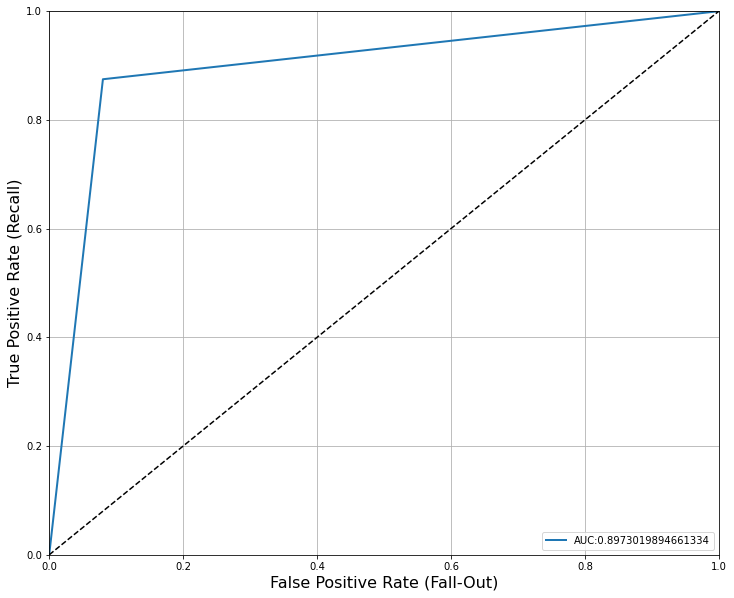

In [154]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_dt, tpr_dt, label = 'AUC:' + str(auc_dt))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': [5,10,15],\
                  'min_samples_split': [25,50,75], 'max_leaf_nodes': [15,30,45],\
                 'min_samples_leaf': [25,50,60]}

dtree_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score = True)
dtree_gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [15, 30, 45],
                         'min_samples_leaf': [25, 50, 60],
                         'min_samples_split': [25, 50, 75]},
             return_train_score=True)

In [156]:
dtree_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_leaf_nodes': 45,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [157]:
dt_opt2 = DecisionTreeClassifier(min_samples_split = 25, max_depth = 5, max_leaf_nodes=15, min_samples_leaf=25)
dt_opt2.fit(X_train, y_train)
y_pred2 = dt_opt2.predict(X_val)

In [158]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred2))
print('*************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred2))
print('*************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred2))
print('*************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred2))
print('*************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred2))
print('*************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred2))

Confusion Matrix:
 
[[2167  376]
 [ 262 1871]]
*************
Accuracy Score:
 
0.8635585970915313
*************
Balanced Accuracy:
 
0.864655722787004
*************
Precision:
 
0.8326657765910103
*************
Recall:
 
0.8771683075480544
*************
F1 Score:
 
0.854337899543379


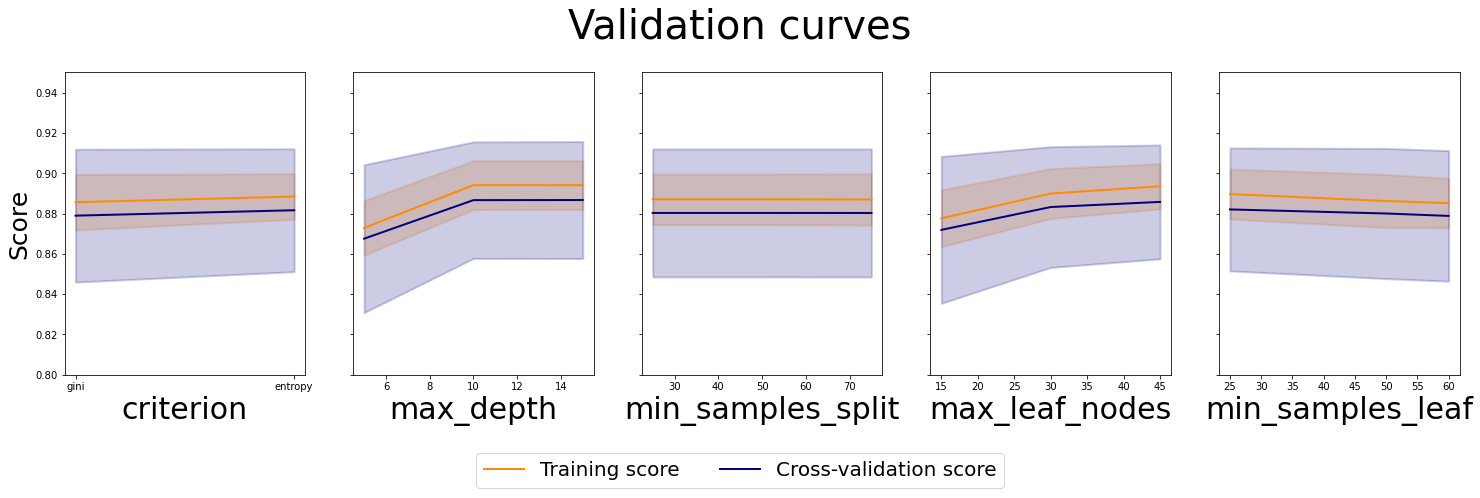

In [159]:
df = pd.DataFrame(dtree_gscv.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

fig, axes = plt.subplots(1, len(param_grid), 
                         figsize = (5*len(param_grid), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(param_grid.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.8, 0.95)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

### 7. Random Forest <a class="anchor" id="forest"></a>
[Back to Contents](#toc)

#### 7.1 Feature Selection - Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [161]:
#no of features
nof_list = np.arange(1, 21)            
high_score = 0
#Variable to store the optimum features
nof = 0           
score_list = []
for n in range(len(nof_list)):
    model_rf = RandomForestClassifier()
    rfe = RFE(model_rf, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model_rf.fit(X_train_rfe,y_train)
    
    score = model_rf.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 19
Score with 19 features: 0.938837


In [162]:
rfe = RFE(estimator = model_rf, n_features_to_select = 19)
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [163]:
X_rfe

array([[0.        , 1.        , 0.43968812, ..., 1.        , 0.49315068,
        1.        ],
       [0.        , 1.        , 0.77113591, ..., 0.        , 0.50684932,
        1.        ],
       [1.        , 1.        , 0.81424859, ..., 1.        , 0.23287671,
        0.        ],
       ...,
       [0.        , 0.        , 0.59685063, ..., 0.        , 0.24657534,
        0.        ],
       [1.        , 1.        , 0.60174285, ..., 0.        , 0.19178082,
        0.        ],
       [0.        , 1.        , 0.42485858, ..., 1.        , 0.52054795,
        1.        ]])

In [164]:
X_train_scaled.columns

Index(['Longevity', 'TypeTravel', 'RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'Gender', 'Age', 'Single',
       'Double'],
      dtype='object')

In [165]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [166]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

In [167]:
selected_features_rf = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features_rf

Longevity             True
TypeTravel            True
RewardPoints          True
Comfort               True
ReceptionSchedule     True
FoodDrink             True
Location              True
Wifi                 False
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut              True
Checkin               True
Cleanliness           True
BarService            True
Gender                True
Age                   True
Single                True
Double               False
dtype: bool

Based on the RFE method, the optional number of features to train our model with a Random Forest Classifier would be 19 features. From all the features present in the dataset we should drop Wifi and Double, according to RFE wrapper method.

| Predictor | Spearman | RFE | Lasso | Decision | 
| --- | --- | --- | --- |--- |
| Longevity | Discard | Keep | Keep | Include in the model |
| TypeTravel | Discard | Keep | Keep | Include in the model |
| RewardPoints | Discard | Keep | Keep | Include in the model |
| Comfort | Discard | Keep | Keep | Include in the model |
| ReceptionSchedule | Keep | Keep | Keep | Include in the model |
| FoodDrink | Discard | Keep | Keep |  Include in the model |
| Wifi | Discard | Discard | Keep |  Try with and without it |
| Amenities | Keep | Keep | Keep |  Include in the model |
| Staff | Keep | Keep | Keep |  Include in the model |
| OnlineBooking | Keep | Kepp | Keep |  Include in the model |
| PriceQuality | Discard | Keep | Keep |  Include in the model |
| RoomSpace | Discard | Keep | Keep |  Include in the model |
| CheckOut | Discard | Keep | Keep |  Include in the model |
| Checkin | Discard | Keep | Keep |  Include in the model |
| Cleanliness | Discard | Keep | Keep |  Include in the model |
| BarService | Keep | Keep | Keep |  Include in the model |
| Gender | Discard | Keep | Keep |  Include in the model |
| Age | Discard | Keep | Keep |  Include in the model |
| Single | Discard | Keep | Keep |  Include in the model |
| Double | Discard | Discard | Keep |  Try with and without it |

#### 7.2 Model Evaluation - Random Forest

#### 7.2.1 Entire dataset

In [168]:
rfc = RandomForestClassifier(max_depth = 7)

In [169]:
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_val_scaled)

In [170]:
print('Train:', rfc.score(X_train_scaled, y_train))
print('Validation:', rfc.score(X_val_scaled, y_val))

Train: 0.9172318973418881
Validation: 0.9131736526946108


In [171]:
max_depth_lst = [1,2,3,4,5,6,7,8,9,10,11]
score_train = []
score_val = []
for i in max_depth_lst:
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train_scaled, y_train)
    run_train = rfc.score(X_train_scaled, y_train)
    run_val = rfc.score(X_val_scaled, y_val)
    score_train.append(run_train)
    score_val.append(run_val)
    
print(score_train)
print(score_val)

[0.8004582951420715, 0.8451879010082494, 0.8716773602199817, 0.8818515123739689, 0.8982584784601283, 0.9042163153070577, 0.9142071494042163, 0.9263061411549037, 0.9386801099908341, 0.9532538955087076, 0.9659028414298808]
[0.795551753635586, 0.8411035072711719, 0.8768177929854577, 0.8834473909324209, 0.8982035928143712, 0.9031223267750214, 0.9086826347305389, 0.9127459366980325, 0.91830624465355, 0.9251497005988024, 0.9283575705731394]


In [172]:
table = pd.DataFrame([max_depth_lst, score_train, score_val], index = ['Run', 'Train score', 'Val score'])
table.T

,Run,Train score,Val score
0,1.0,0.800458,0.795552
1,2.0,0.845188,0.841104
2,3.0,0.871677,0.876818
3,4.0,0.881852,0.883447
4,5.0,0.898258,0.898204
5,6.0,0.904216,0.903122
6,7.0,0.914207,0.908683
7,8.0,0.926306,0.912746
8,9.0,0.938680,0.918306
9,10.0,0.953254,0.925150


#### 7.2.2 Entire dataset except Double

In [173]:
X_train_scaled_rf = X_train_scaled.drop(columns = ['Wifi', 'Double'])
X_val_scaled_rf = X_val_scaled.drop(columns = ['Wifi', 'Double'])

In [174]:
max_depth_lst = [1,2,3,4,5,6,7,8,9,10,11]
score_train_2 = []
score_val_2 = []
for i in max_depth_lst:
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train_scaled_rf, y_train)
    run_train = rfc.score(X_train_scaled_rf, y_train)
    run_val = rfc.score(X_val_scaled_rf, y_val)
    score_train_2.append(run_train)
    score_val_2.append(run_val)
    
print(score_train_2)
print(score_val_2)

[0.7829514207149404, 0.8505957836846929, 0.8635197066911091, 0.8895508707607699, 0.8954170485792851, 0.9041246562786435, 0.9143904674610449, 0.9278643446379469, 0.9433547204399634, 0.9552703941338222, 0.9688359303391384]
[0.783147989734816, 0.8481608212147135, 0.8635585970915313, 0.8902908468776732, 0.894781864841745, 0.9022668947818648, 0.9086826347305389, 0.9153122326775022, 0.9210863986313088, 0.9223695466210436, 0.9285714285714286]


In [175]:
table_2 = pd.DataFrame([max_depth_lst, score_train_2, score_val_2], index = ['Run', 'Train score', 'Val score'])
table_2.T

,Run,Train score,Val score
0,1.0,0.782951,0.783148
1,2.0,0.850596,0.848161
2,3.0,0.863520,0.863559
3,4.0,0.889551,0.890291
4,5.0,0.895417,0.894782
5,6.0,0.904125,0.902267
6,7.0,0.914390,0.908683
7,8.0,0.927864,0.915312
8,9.0,0.943355,0.921086
9,10.0,0.955270,0.922370


In [176]:
print(table.T)
print(table_2.T)

     Run  Train score  Val score
0    1.0     0.800458   0.795552
1    2.0     0.845188   0.841104
2    3.0     0.871677   0.876818
3    4.0     0.881852   0.883447
4    5.0     0.898258   0.898204
5    6.0     0.904216   0.903122
6    7.0     0.914207   0.908683
7    8.0     0.926306   0.912746
8    9.0     0.938680   0.918306
9   10.0     0.953254   0.925150
10  11.0     0.965903   0.928358
     Run  Train score  Val score
0    1.0     0.782951   0.783148
1    2.0     0.850596   0.848161
2    3.0     0.863520   0.863559
3    4.0     0.889551   0.890291
4    5.0     0.895417   0.894782
5    6.0     0.904125   0.902267
6    7.0     0.914390   0.908683
7    8.0     0.927864   0.915312
8    9.0     0.943355   0.921086
9   10.0     0.955270   0.922370
10  11.0     0.968836   0.928571


#### 7.2.3 Testing the number of trees

In [177]:
max_depth_lst = [4,5,6,7,8,9,10,11]
n_estimators_lst = [10,100,200]
score_train_3 = []
score_val_3 = []
score_train_estimators = []
score_val_estimators = []

for i in n_estimators_lst:
    for j in max_depth_lst:
        rfc = RandomForestClassifier(n_estimators = i, max_depth = j)
        rfc.fit(X_train_scaled_rf, y_train)
        run_train = rfc.score(X_train_scaled_rf, y_train)
        run_val = rfc.score(X_val_scaled_rf, y_val)
        score_train_3.append(run_train)
        score_val_3.append(run_val)
    score_train_estimators.append(score_train_3)
    score_val_estimators.append(score_val_3)
    
print(score_train_estimators)
print(score_val_estimators)

[[0.8842346471127406, 0.8879926672777269, 0.9006416131989001, 0.9119156736938588, 0.9279560036663611, 0.9420714940421632, 0.94967919340055, 0.9622364802933089, 0.8879926672777269, 0.8937671860678277, 0.903666361136572, 0.9162236480293309, 0.928505957836847, 0.9423464711274061, 0.9550870760769936, 0.968102658111824, 0.8829514207149404, 0.8967002749770853, 0.9050412465627864, 0.916590284142988, 0.9274060494958754, 0.9419798350137488, 0.956736938588451, 0.9682859761686526], [0.8842346471127406, 0.8879926672777269, 0.9006416131989001, 0.9119156736938588, 0.9279560036663611, 0.9420714940421632, 0.94967919340055, 0.9622364802933089, 0.8879926672777269, 0.8937671860678277, 0.903666361136572, 0.9162236480293309, 0.928505957836847, 0.9423464711274061, 0.9550870760769936, 0.968102658111824, 0.8829514207149404, 0.8967002749770853, 0.9050412465627864, 0.916590284142988, 0.9274060494958754, 0.9419798350137488, 0.956736938588451, 0.9682859761686526], [0.8842346471127406, 0.8879926672777269, 0.900641

In [178]:
max_depth_lst = [4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11]
n_estimators_lst = [10,10,10,10,10,10,10,10,100,100,100,100,100,100,100,100,200,200,200,200,200,200,200,200]

In [179]:
table_3 = pd.DataFrame([n_estimators_lst, max_depth_lst, score_train_3, score_val_3], index = ['# Trees','# Depth', 'Train score', 'Val score'])
table_3.transpose()

,# Trees,# Depth,Train score,Val score
0,10.0,4.0,0.884235,0.882164
1,10.0,5.0,0.887993,0.891788
2,10.0,6.0,0.900642,0.899273
3,10.0,7.0,0.911916,0.906330
4,10.0,8.0,0.927956,0.914029
5,10.0,9.0,0.942071,0.921942
6,10.0,10.0,0.949679,0.922370
7,10.0,11.0,0.962236,0.924508
8,100.0,4.0,0.887993,0.886869
9,100.0,5.0,0.893767,0.893071


In [180]:
max_depth_lst = [4,5,6,7,8,9,10,11]
n_estimators_lst = [100,150,200]
score_train_4 = []
score_val_4 = []
score_train_estimators_2 = []
score_val_estimators_2 = []

for i in n_estimators_lst:
    for j in max_depth_lst:
        rfc = RandomForestClassifier(n_estimators = i, max_depth = j)
        rfc.fit(X_train_scaled_rf, y_train)
        run_train = rfc.score(X_train_scaled_rf, y_train)
        run_val = rfc.score(X_val_scaled_rf, y_val)
        score_train_4.append(run_train)
        score_val_4.append(run_val)
    score_train_estimators_2.append(score_train_4)
    score_val_estimators_2.append(score_val_4)
    
print(score_train_estimators_2)
print(score_val_estimators_2)

[[0.8836846929422548, 0.8959670027497708, 0.9030247479376718, 0.9135655362053162, 0.9287809349220898, 0.9439963336388635, 0.955820348304308, 0.9682859761686526, 0.8872593950504125, 0.8964252978918423, 0.9024747937671861, 0.9145737855178735, 0.9293308890925757, 0.941704857928506, 0.9549954170485793, 0.9685609532538955, 0.8853345554537122, 0.8987167736021998, 0.9028414298808433, 0.918423464711274, 0.9284142988084326, 0.9421631530705774, 0.9557286892758937, 0.9680109990834097], [0.8836846929422548, 0.8959670027497708, 0.9030247479376718, 0.9135655362053162, 0.9287809349220898, 0.9439963336388635, 0.955820348304308, 0.9682859761686526, 0.8872593950504125, 0.8964252978918423, 0.9024747937671861, 0.9145737855178735, 0.9293308890925757, 0.941704857928506, 0.9549954170485793, 0.9685609532538955, 0.8853345554537122, 0.8987167736021998, 0.9028414298808433, 0.918423464711274, 0.9284142988084326, 0.9421631530705774, 0.9557286892758937, 0.9680109990834097], [0.8836846929422548, 0.8959670027497708, 

In [181]:
max_depth_lst = [4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11]
n_estimators_lst = [100,100,100,100,100,100,100,100,150,150,150,150,150,150,150,150,200,200,200,200,200,200,200,200]

In [182]:
table_4 = pd.DataFrame([n_estimators_lst, max_depth_lst, score_train_4, score_val_4], index = ['Estimators','Run', 'Train score', 'Val score'])
table_4.transpose()

,Estimators,Run,Train score,Val score
0,100.0,4.0,0.883685,0.881950
1,100.0,5.0,0.895967,0.897562
2,100.0,6.0,0.903025,0.902481
3,100.0,7.0,0.913566,0.907827
4,100.0,8.0,0.928781,0.914243
5,100.0,9.0,0.943996,0.921086
6,100.0,10.0,0.955820,0.924722
7,100.0,11.0,0.968286,0.932207
8,150.0,4.0,0.887259,0.886869
9,150.0,5.0,0.896425,0.896920


In [183]:
max_depth_lst = [4,5,6,7,8,9,10,11]
n_estimators_lst = [100,150,200]
score_train_4 = []
score_val_4 = []
f1_score_ = []
score_train_estimators_2 = []
score_val_estimators_2 = []
f1_score_estimators = []

for i in n_estimators_lst:
    for j in max_depth_lst:
        rfc = RandomForestClassifier(n_estimators = i, max_depth = j)
        rfc.fit(X_train_scaled_rf, y_train)
        y_pred = rfc.predict(X_val_scaled_rf)
        run_train = rfc.score(X_train_scaled_rf, y_train)
        run_val = rfc.score(X_val_scaled_rf, y_val)
        f1 = f1_score(y_val, y_pred)
        score_train_4.append(run_train)
        score_val_4.append(run_val)
        f1_score_.append(f1)
    score_train_estimators_2.append(score_train_4)
    score_val_estimators_2.append(score_val_4)
    f1_score_estimators.append(f1_score_)
    
print(score_train_estimators_2)
print(score_val_estimators_2)
print(f1_score_estimators)

[[0.8789184234647113, 0.8963336388634281, 0.9032997250229148, 0.9148487626031164, 0.9278643446379469, 0.9419798350137488, 0.9544454628780935, 0.9669110907424381, 0.8864344637946838, 0.8978001833180568, 0.9050412465627864, 0.9155820348304308, 0.9279560036663611, 0.9421631530705774, 0.9556370302474794, 0.9683776351970669, 0.8827681026581118, 0.8952337305224565, 0.9024747937671861, 0.915032080659945, 0.9277726856095325, 0.943263061411549, 0.9549954170485793, 0.9686526122823098], [0.8789184234647113, 0.8963336388634281, 0.9032997250229148, 0.9148487626031164, 0.9278643446379469, 0.9419798350137488, 0.9544454628780935, 0.9669110907424381, 0.8864344637946838, 0.8978001833180568, 0.9050412465627864, 0.9155820348304308, 0.9279560036663611, 0.9421631530705774, 0.9556370302474794, 0.9683776351970669, 0.8827681026581118, 0.8952337305224565, 0.9024747937671861, 0.915032080659945, 0.9277726856095325, 0.943263061411549, 0.9549954170485793, 0.9686526122823098], [0.8789184234647113, 0.8963336388634281

In [184]:
max_depth_lst = [4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11]
n_estimators_lst = [100,100,100,100,100,100,100,100,150,150,150,150,150,150,150,150,200,200,200,200,200,200,200,200]

In [185]:
table_5 = pd.DataFrame([n_estimators_lst, max_depth_lst, score_train_4, score_val_4, f1_score_], index = ['Estimators','Run', 'Train score', 'Val score', 'F1 score'])
table_5.transpose()

,Estimators,Run,Train score,Val score,F1 score
0,100.0,4.0,0.878918,0.878315,0.865834
1,100.0,5.0,0.896334,0.896707,0.885082
2,100.0,6.0,0.903300,0.901839,0.890165
3,100.0,7.0,0.914849,0.909110,0.898447
4,100.0,8.0,0.927864,0.915526,0.906465
5,100.0,9.0,0.941980,0.920659,0.912148
6,100.0,10.0,0.954445,0.924080,0.916095
7,100.0,11.0,0.966911,0.929427,0.922389
8,150.0,4.0,0.886434,0.886228,0.873694
9,150.0,5.0,0.897800,0.897776,0.885864


#### 7.2.4 Comparison

In [186]:
print(table.T)
print('--------------------------------')
print(table_2.T)
print('--------------------------------')
print(table_3.T)
print('--------------------------------')
print(table_4.T)
print('--------------------------------')
print(table_5.T)

     Run  Train score  Val score
0    1.0     0.800458   0.795552
1    2.0     0.845188   0.841104
2    3.0     0.871677   0.876818
3    4.0     0.881852   0.883447
4    5.0     0.898258   0.898204
5    6.0     0.904216   0.903122
6    7.0     0.914207   0.908683
7    8.0     0.926306   0.912746
8    9.0     0.938680   0.918306
9   10.0     0.953254   0.925150
10  11.0     0.965903   0.928358
--------------------------------
     Run  Train score  Val score
0    1.0     0.782951   0.783148
1    2.0     0.850596   0.848161
2    3.0     0.863520   0.863559
3    4.0     0.889551   0.890291
4    5.0     0.895417   0.894782
5    6.0     0.904125   0.902267
6    7.0     0.914390   0.908683
7    8.0     0.927864   0.915312
8    9.0     0.943355   0.921086
9   10.0     0.955270   0.922370
10  11.0     0.968836   0.928571
--------------------------------
    # Trees  # Depth  Train score  Val score
0      10.0      4.0     0.884235   0.882164
1      10.0      5.0     0.887993   0.891788
2      

#### 7.2.5 Random Forest - Grid Search

In [187]:

parameters_rf = {'n_estimators': [50,100,150], 'criterion': ('gini', 'entropy'), 'max_depth': [6,7,8,9], 
              'min_samples_leaf': [1,2,3], 'max_features' : ['sqrt','log2']}

gs_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv = 5, return_train_score=True)
gs_rf.fit(X_train_scaled_rf,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [188]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

#### 7.2.6 Random Forest Metrics

In [189]:
rfc_opt = RandomForestClassifier(n_estimators = 150, max_depth = 7)
rfc_opt.fit(X_train_scaled_rf, y_train)
y_pred = rfc_opt.predict(X_val_scaled_rf)

In [190]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred))
print('*************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred))
print('*************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred))
print('*************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred))
print('*************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred))
print('*************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred))

Confusion Matrix:
 
[[2366  177]
 [ 254 1879]]
*************
Accuracy Score:
 
0.9078272027373824
*************
Balanced Accuracy:
 
0.9056580311377546
*************
Precision:
 
0.9139105058365758
*************
Recall:
 
0.8809188935771214
*************
F1 Score:
 
0.8971114824540463


In [191]:
#With parameters from grid search

rfc_opt_2 = RandomForestClassifier(n_estimators = 100, max_depth = 9, criterion = 'gini', max_features = 'log2', min_samples_leaf = 3)
rfc_opt_2.fit(X_train_scaled_rf, y_train)
y_pred_2 = rfc_opt.predict(X_val_scaled_rf)

In [192]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_2))
print('*************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_2))
print('*************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_2))
print('*************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_2))
print('*************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_2))
print('*************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_2))

Confusion Matrix:
 
[[2366  177]
 [ 254 1879]]
*************
Accuracy Score:
 
0.9078272027373824
*************
Balanced Accuracy:
 
0.9056580311377546
*************
Precision:
 
0.9139105058365758
*************
Recall:
 
0.8809188935771214
*************
F1 Score:
 
0.8971114824540463


In [193]:
print(rfc_opt_2.score(X_train_scaled_rf, y_train ))
print(rfc_opt_2.score(X_val_scaled_rf, y_val))

0.9381301558203483
0.9206586826347305


In [194]:
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 5)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
        X_val['Age'] = X_val['Age'].fillna(X_train['Age'].median()) # use the median from the train set
        
        # Data Scaling
        # Apply MinMaxScaler
        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train) 
        X_val_scaled = scaler.transform(X_val) # Scaling with 'scaler' from train data
        
        
        # Apply model
        model.fit(X_train_scaled, y_train)
        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)

In [195]:
from sklearn.model_selection import StratifiedKFold

compare_models(X, y, RandomForestClassifier(n_estimators = 150, max_depth = 7))

('0.904+/-0.0', '0.897+/-0.0')

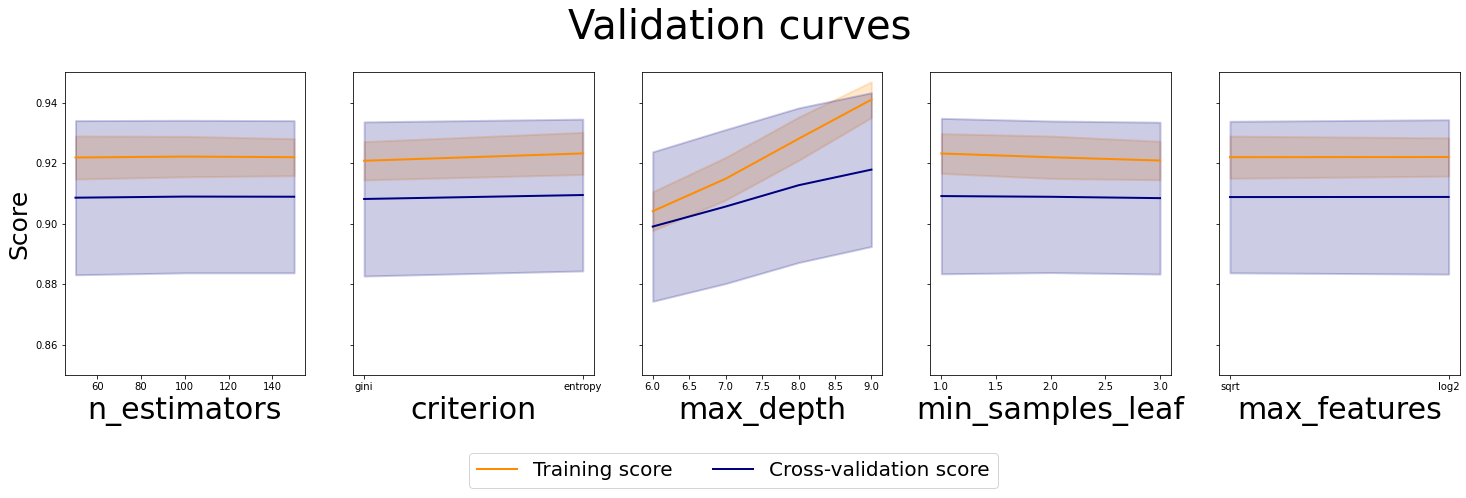

In [196]:
df = pd.DataFrame(gs_rf.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

fig, axes = plt.subplots(1, len(parameters_rf), 
                         figsize = (5*len(parameters_rf), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(parameters_rf.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.85, 0.95)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

In [199]:
gini_importance_rf = RandomForestClassifier(n_estimators = 100, max_depth = 9, criterion = 'gini', max_features = 'log2', min_samples_leaf = 3)
gini_importance_fit_rf = gini_importance_rf.fit(X_train_scaled_rf, y_train).feature_importances_
entropy_importance_rf = RandomForestClassifier(n_estimators = 100, max_depth = 9, criterion = 'entropy', max_features = 'log2', min_samples_leaf = 3)
entropy_importance_fit_rf = entropy_importance_rf.fit(X_train_scaled_rf, y_train).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

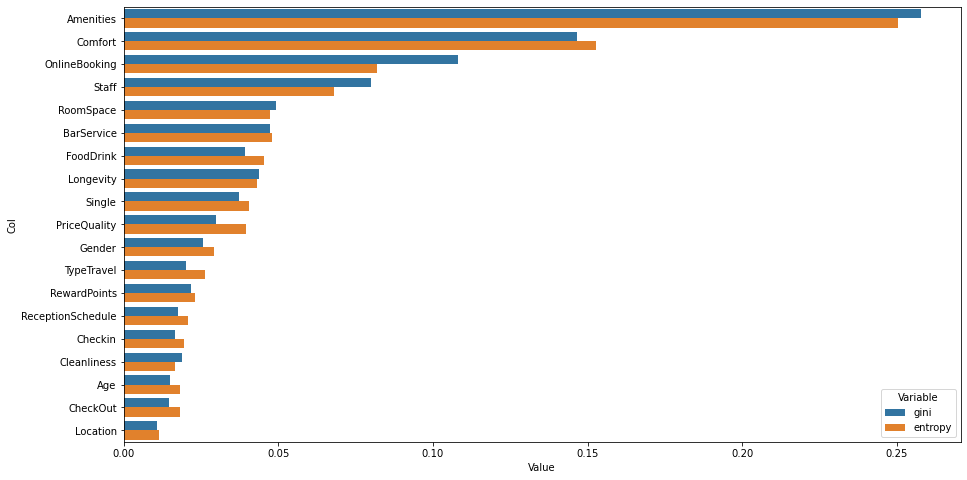

In [200]:
zippy = pd.DataFrame(zip(gini_importance_fit_rf, entropy_importance_fit_rf), columns = ['gini','entropy'])
zippy['col'] = X_train_scaled_rf.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [201]:
from sklearn.metrics import roc_curve, roc_auc_score



fpr_rf, tpr_rf, thresholds = roc_curve(y_val, y_pred_2)
auc_rf = roc_auc_score(y_val, y_pred)

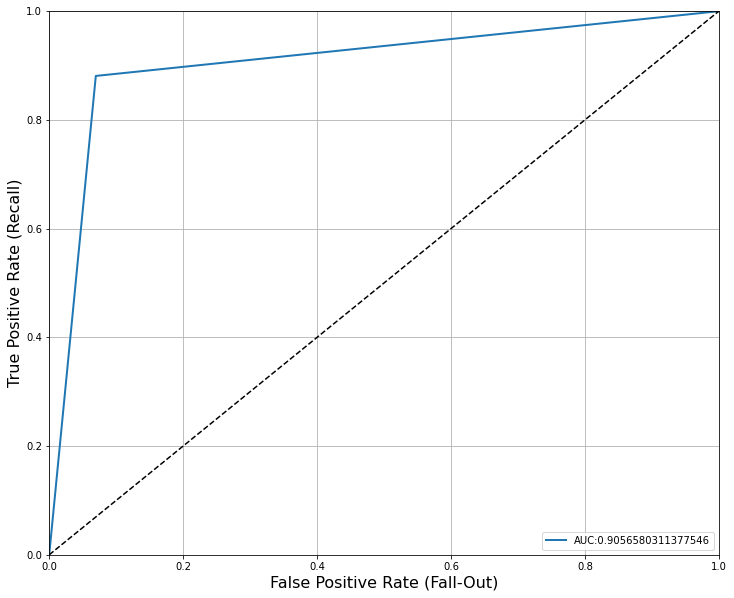

In [202]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_rf, tpr_rf, label = 'AUC:' + str(auc_rf))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

### 8. XGBoost <a class="anchor" id="xgboost"></a>
[Back to Contents](#toc)

#### 8.1. XGBoost - Model Evaluation

In [203]:
#FINE TUNING
#Default => Tuned
#~0.9409 => 0.94435

#Success
#0.94145 learning_rate 0.3 => 0.4
#0.94435 reg_lambda 1 => 2

#NoSuccess
#gamma 0 (default)
#max_depth 6 (default)
#subsample 1 (default)
#colsample_bytree 1 (default)

import xgboost as xgb

xgb_cl = xgb.XGBClassifier(learning_rate=0.40, reg_lambda=2)

In [204]:
X_XGB_train = X_train
y_XGB_train = y_train
X_XGB_val = X_val
y_XGB_val = y_val

In [205]:
# Fit
xgb_cl.fit(X_XGB_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=2, ...)

In [206]:
# Predict
xgb_preds = xgb_cl.predict(X_XGB_val)
f1_score(y_XGB_val, xgb_preds)

0.9443531345386241

In [207]:
print('XGBoost Train:', xgb_cl.score(X_XGB_train, y_XGB_train))
print('XGBoost Validation:', xgb_cl.score(X_XGB_val, y_XGB_val))

XGBoost Train: 0.9987167736021998
XGBoost Validation: 0.9493156544054747


Links XGboost overfitting:
https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [208]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_XGB_val, xgb_preds)
auc = roc_auc_score(y_XGB_val, xgb_preds)

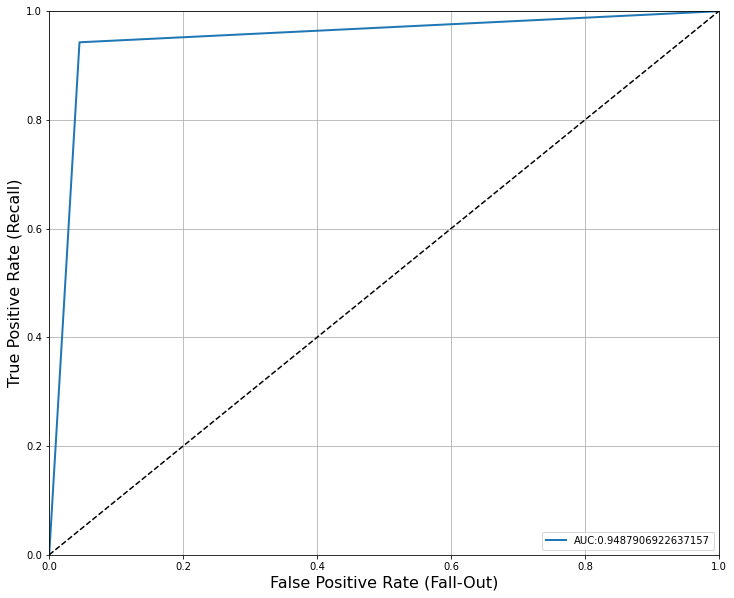

In [209]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr, tpr, label = 'AUC:' + str(auc))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

#### 8.2. XGBoost Feature Selection

In [210]:
XGB_FeaturesTry = X_XGB_train[['Wifi','Cleanliness','Double']]

X_XGB_train_test = X_XGB_train.copy()
y_XGB_train_test = y_train.copy()
X_XGB_val_test = X_val.copy()
y_XGB_val_test = y_val.copy()

#Remove columns XGB_FeaturesTry

for cols in XGB_FeaturesTry:
    #print(cols)
    X_XGB_train_test.drop(str(cols), axis = 1, inplace=True) 
    X_XGB_val_test.drop(str(cols), axis = 1, inplace=True) 

input = XGB_FeaturesTry.columns
output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
#output

In [211]:
XGB_metrics = pd.DataFrame(columns=['Features','F1','Train','Validation', 'Delta'])

for cols in output:
    X_XGB_train_renew = X_XGB_train_test.copy().join(X_XGB_train[cols])
    X_XGB_val_renew = X_XGB_val_test.copy().join(X_XGB_val[cols])
    
    # Fit for each combination of columns
    # Avoid warning in evaluation metric https://stackoverflow.com/questions/66097701/how-can-i-fix-this-warning-in-xgboost
    xgb_cl.fit(X_XGB_train_renew, y_XGB_train_test, eval_metric='mlogloss')
    
    # Predict
    xgb_preds = xgb_cl.predict(X_XGB_val_renew)
    
    #Create metrics
    XGB_metrics.loc[XGB_metrics.shape[0]] = [cols, f1_score(y_XGB_val, xgb_preds), xgb_cl.score(X_XGB_train_renew, y_XGB_train_test),
                                               xgb_cl.score(X_XGB_val_renew,y_XGB_val_test), xgb_cl.score(X_XGB_train_renew, y_XGB_train_test) - xgb_cl.score(X_XGB_val_renew,y_XGB_val_test)]
    
XGB_metrics

,Features,F1,Train,Validation,Delta
0,[],0.936170,0.998717,0.941617,0.057100
1,[Wifi],0.936958,0.998075,0.942472,0.055603
2,[Cleanliness],0.941479,0.998900,0.946536,0.052365
3,[Double],0.938527,0.998533,0.943969,0.054564
4,"[Wifi, Cleanliness]",0.937750,0.998442,0.943328,0.055114
5,"[Wifi, Double]",0.936886,0.997250,0.942258,0.054992
6,"[Cleanliness, Double]",0.938747,0.998075,0.944183,0.053892
7,"[Wifi, Cleanliness, Double]",0.944353,0.998717,0.949316,0.049401


* We tested the XGBoost model on the dataset without all the features iteratively.
* We concluded that the XGBoost performs best when trained with the dataset with all the features.

After computing the GridSearchCV we end up with the best hyperparameters for the XGBoost model for our dataset.\
We will test them below.

In [212]:
xgb_cl = xgb.XGBClassifier(colsample_bytree= 0.4, gamma=3, learning_rate=0.3, max_depth=5, reg_lambda=1, scale_pos_weight=2, subsample= 0.75, min_child_weight = 2.5)
# valor submetido no kaggle

In [213]:
xgb_cl_2 = xgb.XGBClassifier(max_depth=4,
                             learning_rate=0.1614,
                             gamma=5.6506446,
                             reg_lambda=0.828,
                             scale_pos_weight=1.566,
                             subsample=0.8737,
                             colsample_bytree=0.9953,
                             min_child_weight=2.41619,
                             n_estimators=350)

In [214]:
xgb_cl.fit(X_XGB_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2.5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [215]:
xgb_cl_2.fit(X_XGB_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9953,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5.6506446, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1614, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=2.41619, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.828, ...)

In [216]:
xgb_preds = xgb_cl.predict(X_XGB_val)
f1_score(y_XGB_val, xgb_preds)

0.9405850091407678

In [217]:
print('XGBoost Train:', xgb_cl.score(X_XGB_train, y_XGB_train))
print('XGBoost Validation:', xgb_cl.score(X_XGB_val, y_XGB_val))
print('Delta:', xgb_cl.score(X_XGB_train, y_XGB_train) - xgb_cl.score(X_XGB_val, y_XGB_val))

XGBoost Train: 0.965627864344638
XGBoost Validation: 0.9443969204448246
Delta: 0.021230943899813393


In [218]:
xgb_preds_2 = xgb_cl_2.predict(X_XGB_val)
f1_score(y_XGB_val, xgb_preds_2)

0.9459645895608185

In [219]:
print('XGBoost Train:', xgb_cl_2.score(X_XGB_train, y_XGB_train))
print('XGBoost Validation:', xgb_cl_2.score(X_XGB_val, y_XGB_val))
print('Delta:', xgb_cl_2.score(X_XGB_train, y_XGB_train) - xgb_cl_2.score(X_XGB_val, y_XGB_val))

XGBoost Train: 0.9626947754353804
XGBoost Validation: 0.949743370402053
Delta: 0.012951405033327368


In [220]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_XGB_val, xgb_preds_2)
auc_xgb = roc_auc_score(y_XGB_val, xgb_preds_2)

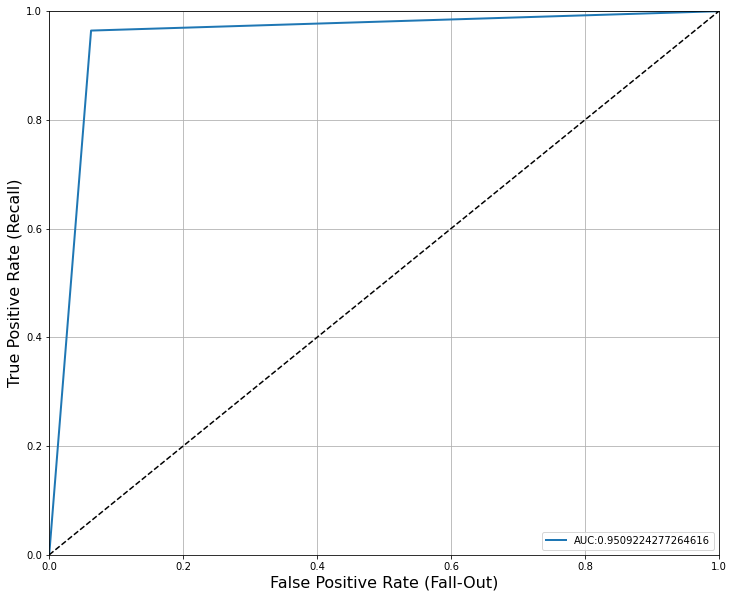

In [221]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_xgb, tpr_xgb, label = 'AUC:' + str(auc_xgb))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

### 9. Neural Network - Multi Layer Perceptron <a class="anchor" id="neural"></a>
[Back to Contents](#toc)

In [222]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, GridSearchCV
import time

In [223]:
def avg_score(model): # o modelo vai ser avaliado várias vezes e vamos obter um average score
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time
        begin = time.perf_counter() # count time that the model is running to see what parameters are taking longer to load
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the validation
        value_val = model.score(X_val, y_val) # obter o score dos 2 para evitar overfit
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

In [224]:
def show_results(df, *args): # usar a função para calcular o score dos vários modelos
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

In [225]:
parameter_space = {'hidden_layer_sizes': [(150, 100, 100), (150, 100, 50)],
                    'max_iter': [400, 450, 500],
                    'activation': ['relu', 'logistic', 'tanh'],
                    'solver': ['sgd', 'adam'],
                    'learning_rate_init': [0.05, 0.1, 0.2]
                    }

In [226]:
model_mlp = MLPClassifier(hidden_layer_sizes= (150, 100, 50), max_iter= 800, activation = 'logistic', solver = 'sgd', learning_rate_init= 0.05, learning_rate= 'constant')
#df_results = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
#show_results(df_results, model_mlp)

In [227]:
model_mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              learning_rate_init=0.05, max_iter=800, solver='sgd')

In [228]:
print('Train:', model_mlp.score(X_train_scaled, y_train))
print('Validation:', model_mlp.score(X_val_scaled, y_val))

Train: 0.9219981668194317
Validation: 0.9185201026518391


In [229]:
y_pred_mlp = model_mlp.predict(X_val_scaled)
y_pred_mlp

array([0, 0, 0, ..., 0, 0, 0])

In [230]:
print('Confusion Matrix:')
print(' ')
print(confusion_matrix(y_val, y_pred_mlp))
print('*************')
print('Accuracy Score:')
print(' ')
print(accuracy_score(y_val, y_pred_mlp))
print('*************')
print('Balanced Accuracy:')
print(' ')
print(balanced_accuracy_score(y_val, y_pred_mlp))
print('*************')
print('Precision:')
print(' ')
print(precision_score(y_val, y_pred_mlp))
print('*************')
print('Recall:')
print(' ')
print(recall_score(y_val, y_pred_mlp))
print('*************')
print('F1 Score:')
print(' ')
print(f1_score(y_val, y_pred_mlp))

Confusion Matrix:
 
[[2368  175]
 [ 206 1927]]
*************
Accuracy Score:
 
0.9185201026518391
*************
Balanced Accuracy:
 
0.917303025559993
*************
Precision:
 
0.9167459562321598
*************
Recall:
 
0.9034224097515237
*************
F1 Score:
 
0.9100354191263281


In [231]:
clf_mlp = GridSearchCV(model_mlp, parameter_space)
#clf_mlp.fit(X_train_scaled, y_train)

In [232]:
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_val, y_pred_mlp)
auc_mlp = roc_auc_score(y_val, y_pred_mlp)

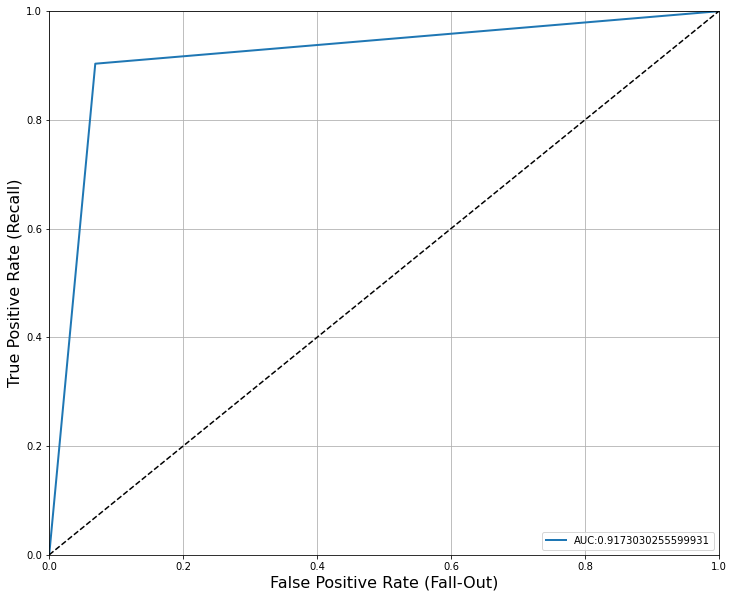

In [233]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_mlp, tpr_mlp, label = 'AUC:' + str(auc_mlp))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

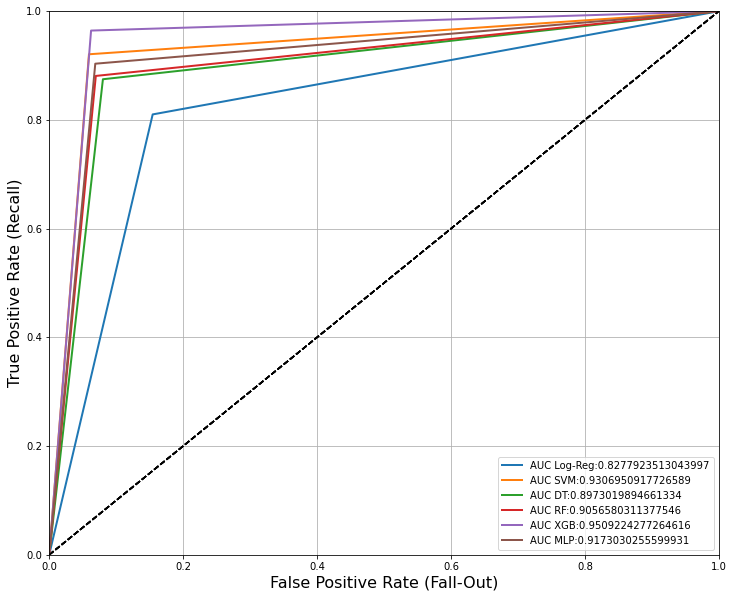

In [234]:
def plot_roc_curve(fpr, tpr, label = 'AUC= ' + str(auc)):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(12, 10))                                  
plot_roc_curve(fpr_log, tpr_log, label = 'AUC Log-Reg:' + str(auc_log))
plot_roc_curve(fpr_svm, tpr_svm, label = 'AUC SVM:' + str(auc_svm))
plot_roc_curve(fpr_dt, tpr_dt, label = 'AUC DT:' + str(auc_dt))
plot_roc_curve(fpr_rf, tpr_rf, label = 'AUC RF:' + str(auc_rf))
plot_roc_curve(fpr_xgb, tpr_xgb, label = 'AUC XGB:' + str(auc_xgb))
plot_roc_curve(fpr_mlp, tpr_mlp, label = 'AUC MLP:' + str(auc_mlp))
plt.legend(loc = 4)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
#plt.plot([fpr_90], [recall_90_precision], "ro")              
#save_fig("roc_curve_plot")                                   
plt.show()

### 10. Final Predictions <a class="anchor" id="predicions"></a>
[Back to Contents](#toc)

#### 10.1. XGBoost

In [235]:
pred_final_xgb = xgb_cl_2.predict(df_test)
pred_final_xgb

array([1, 1, 0, ..., 1, 1, 0])

In [236]:
customer_index = df_test.index.T
answer = pd.DataFrame([customer_index, pred_final_xgb]).T
answer.columns = ['Cust_ID','Churn']
answer

,Cust_ID,Churn
0,30000,1
1,30001,1
2,30002,0
3,30003,1
4,30004,0
...,...,...
5190,35190,1
5191,35191,0
5192,35192,1
5193,35193,1


In [237]:
#answer.to_csv('answer_XGBFinal.csv', index = None)

In [238]:
scaler = MinMaxScaler()
scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns = df_test.columns, index = df_test.index)
df_test_scaled.head(5)

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,0.0,0.0,0.802058,0.4,0.8,0.4,0.4,0.2,0.4,0.00,...,1.00,0.6,0.75,0.75,0.75,0.2,0.0,0.794521,0.0,1.0
30001,0.0,0.0,0.857992,0.4,0.8,0.4,0.2,0.8,0.4,0.75,...,0.75,1.0,0.75,0.50,0.00,0.8,0.0,0.136986,0.0,1.0
30002,1.0,1.0,0.735111,1.0,0.8,0.8,0.6,0.4,0.8,0.00,...,1.00,1.0,1.00,0.50,0.75,0.4,0.0,0.301370,1.0,0.0
30003,0.0,0.0,0.760469,0.8,1.0,0.8,0.6,0.6,0.8,0.50,...,0.50,1.0,1.00,0.50,0.75,0.6,0.0,0.383562,0.0,1.0
30004,0.0,1.0,0.869149,0.8,0.4,0.4,0.4,1.0,0.8,0.50,...,0.75,0.8,0.75,0.75,0.75,0.8,1.0,0.602740,0.0,1.0


#### 10.2. Support Vector Machine

In [239]:
df_test_svm = df_test_scaled.copy()
df_test_svm.drop(['Wifi', 'Cleanliness'], axis = 1, inplace = True)
df_test_svm

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,BarService,Gender,Age,Single,Double
Cust_ID,,,,,,,,,,,,,,,,,,,
30000,0.0,0.0,0.802058,0.4,0.8,0.4,0.4,0.4,0.00,0.2,1.00,0.6,0.75,0.75,0.2,0.0,0.794521,0.0,1.0
30001,0.0,0.0,0.857992,0.4,0.8,0.4,0.2,0.4,0.75,0.8,0.75,1.0,0.75,0.50,0.8,0.0,0.136986,0.0,1.0
30002,1.0,1.0,0.735111,1.0,0.8,0.8,0.6,0.8,0.00,0.4,1.00,1.0,1.00,0.50,0.4,0.0,0.301370,1.0,0.0
30003,0.0,0.0,0.760469,0.8,1.0,0.8,0.6,0.8,0.50,0.6,0.50,1.0,1.00,0.50,0.6,0.0,0.383562,0.0,1.0
30004,0.0,1.0,0.869149,0.8,0.4,0.4,0.4,0.8,0.50,0.8,0.75,0.8,0.75,0.75,0.8,1.0,0.602740,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,0.0,1.0,0.970004,0.4,0.6,0.6,0.6,0.6,0.50,0.4,0.25,0.6,0.25,0.50,0.8,1.0,0.753425,1.0,0.0
35191,0.0,1.0,0.857267,1.0,0.4,0.4,0.4,1.0,1.00,1.0,0.50,0.4,0.50,0.75,1.0,0.0,0.589041,0.0,1.0
35192,0.0,1.0,0.771482,0.6,0.2,0.2,0.2,0.6,0.50,0.6,0.50,0.8,0.75,0.00,0.6,0.0,0.821918,0.0,1.0


In [240]:
pred_final_svm = model_svm.predict(df_test_svm)
pred_final_svm

array([1, 1, 0, ..., 1, 1, 0])

In [241]:
customer_index = df_test_svm.index.T
answer2 = pd.DataFrame([customer_index, pred_final_svm]).T
answer2.columns = ['Cust_ID','Churn']
answer2

,Cust_ID,Churn
0,30000,1
1,30001,1
2,30002,0
3,30003,1
4,30004,0
...,...,...
5190,35190,1
5191,35191,0
5192,35192,1
5193,35193,1


In [242]:
#answer2.to_csv('answer2.csv', index = None)

#### 10.3. Multi Layer Perceptron

In [243]:
predict_final_mlp = model_mlp.predict(df_test_scaled)
predict_final_mlp

array([1, 1, 0, ..., 1, 1, 0])

In [244]:
customer_index = df_test_scaled.index.T
answer3 = pd.DataFrame([customer_index, predict_final_mlp]).T
answer3.columns = ['Cust_ID','Churn']
answer3

,Cust_ID,Churn
0,30000,1
1,30001,1
2,30002,0
3,30003,0
4,30004,0
...,...,...
5190,35190,1
5191,35191,0
5192,35192,1
5193,35193,1


In [245]:
#answer3.to_csv('answer3.csv', index = None)